<a href="https://colab.research.google.com/github/clobos/Andres_ESALQ/blob/main/posgraduao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados_estudantes_de_posgraduacao = pd.read_csv('estudante_de_pos_graduacao.csv')
dados_estudantes_de_posgraduacao.head()

Idade                     Vínculo       Sexo  Ano_ingresso  \
0  De 26 a 35 anos  Estudante de Pós Graduação   Feminino        2023.0   
1  De 18 a 25 anos  Estudante de Pós Graduação  Masculino        2024.0   
2  De 26 a 35 anos  Estudante de Pós Graduação   Feminino        2022.0   
3  De 26 a 35 anos  Estudante de Pós Graduação  Masculino        2022.0   
4  De 26 a 35 anos  Estudante de Pós Graduação   Feminino        2020.0   

   Curso_grad                        Programa_pós      Nível  Departamento  \
0           0    Engenharia de Sistemas Agrícolas   Mestrado             0   
1           0                                CENA  Doutorado             0   
2           0  Genética e Melhoramento de Plantas  Doutorado             0   
3           0         Solos e Nutrição de Plantas   Mestrado             0   
4           0                   Ecologia Aplicada  Doutorado             0   

   Setor  Origem_vist  ...    C_int        C_infacd C_orgtrans  C_qveic  \
0      0            0  ...    Ótimo             Bom        Bom  Regular   
1      0            0  ...      Bom             Bom        Bom      Bom   
2      0            0  ...  Regular         Regular       Ruim     Ruim   
3      0            0  ...      Bom  Não sei opinar        Bom      Bom   
4      0            0  ...  Regular             Bom        Bom  Regular   

          C_visit C_funcio  C_santi   C_mobl       C_aPSaude Interesse_ativ  
0           Ótimo        0      Bom      Bom           Ótimo          Pouco  
1             Bom        0  Regular  Regular         Regular       Bastante  
2         Regular        0     Ruim      NaN            Ruim       Bastante  
3  Não sei opinar        0     Ruim    Ótimo  Não sei opinar       Bastante  
4            Ruim        0  Péssimo     Ruim            Ruim       Bastante  

[5 rows x 57 columns]

In [ ]:
print(dados_estudantes_de_posgraduacao.columns)

Index(['Idade', 'Vínculo', 'Sexo', 'Ano_ingresso', 'Curso_grad',
       'Programa_pós', 'Nível', 'Departamento', 'Setor', 'Origem_vist',
       'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação',
       'Particip_fora', 'Interesse', 'Conhecimento', 'Compromisso',
       'Transformador', 'Segurança', 'Alt_seg_noite', 'Distância',
       'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias', 'S_cal',
       'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol', 'C_pert',
       'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
       'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
       'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_funcio',
       'C_santi', 'C_mobl', 'C_aPSaude', 'Interesse_ativ'],
      dtype='object')


In [ ]:
def clean_idade(idade_str):
    """Removes 'De', 'a', and 'anos' from the idade string and returns a list of numbers."""
    if pd.isna(idade_str):
        return None
    cleaned = idade_str.replace('De ', '').replace(' a ', '-').replace(' anos', '').replace(' ', '')
    if '-' in cleaned:
        return [int(i) for i in cleaned.split('-')]
    elif cleaned.isdigit():
        return [int(cleaned)]
    else:
        return cleaned # Return as is if it doesn't fit the expected pattern

dados_estudantes_de_posgraduacao['idade_limpa'] = dados_estudantes_de_posgraduacao['Idade'].apply(clean_idade)

# Drop the original 'Idade' column
dados_estudantes_de_posgraduacao = dados_estudantes_de_posgraduacao.drop(columns=['Idade'])

In [ ]:
dados_estudantes_de_posgraduacao['idade_limpa'].value_counts()

idade_limpa
[26, 35]    71
[18, 25]    13
[36, 45]     5
[46, 55]     2
[56, 65]     1
Name: count, dtype: int64

In [ ]:
# Select float64 columns and calculate min and max
float_cols = dados_estudantes_de_posgraduacao.select_dtypes(include='float64')
print("Min and Max for Float64 columns:")
display(float_cols.agg(['min', 'max']))

Min and Max for Float64 columns:


Ano_ingresso  Distância
min        2006.0        1.0
max        2024.0      115.0

In [ ]:
# Select integer64 columns and calculate min and max
int_cols = dados_estudantes_de_posgraduacao.select_dtypes(include='int64')
print("Min and Max for int64 columns:")
display(int_cols.agg(['min', 'max']))


Min and Max for int64 columns:


Curso_grad  Departamento  Setor  Origem_vist  C_funcio
min           0             0      0            0         0
max           0             0      0            0         0

In [ ]:
colunas_para_excluir_posgraduacao = [
    'Curso_grad',
    'Departamento',
    'Setor',
    'Origem_vist',
    'C_funcio'
]

dados_estudantes_de_posgraduacao = dados_estudantes_de_posgraduacao.drop(columns=colunas_para_excluir_posgraduacao, errors='ignore')

In [ ]:
# Select object columns and generate frequency tables
object_cols = dados_estudantes_de_posgraduacao.select_dtypes(include='object')
print("\nFrequency Tables for Object columns:")
for col in object_cols.columns:
    print(f"\nFrequency for {col}:")
    display(object_cols[col].value_counts())


Frequency Tables for Object columns:

Frequency for Vínculo:


Vínculo
Estudante de Pós Graduação    92
Name: count, dtype: int64


Frequency for Sexo:


Sexo
Feminino                 46
Masculino                43
Outro                     2
Prefiro não responder     1
Name: count, dtype: int64


Frequency for Programa_pós:


Programa_pós
Solos e Nutrição de Plantas                14
Recursos Florestais                        12
Entomologia                                10
Ecologia Aplicada                           8
Fitotecnia                                  8
Engenharia de Sistemas Agrícolas            7
Estatística e Experimentação Agronômica     6
Economia Aplicada                           5
Genética e Melhoramento de Plantas          5
CENA                                        4
Fisiologia e Bioquímica de Plantas          3
Administração                               3
Ciência e Tecnologia de Alimentos           2
Microbiologia Agrícola                      2
Ciência Animal e Pastagem                   1
Fitopatologia                               1
Ciências (CENA)                             1
Name: count, dtype: int64


Frequency for Nível:


Nível
Doutorado    60
Mestrado     32
Name: count, dtype: int64


Frequency for Frequencia:


Frequencia
Diariamente (de segunda a domingo)           37
Apenas em dias úteis (de segunda a sexta)    34
De uma à três vezes na semana                20
Aos finais de semana                          1
Name: count, dtype: int64


Frequency for Campus_agradavel:


Campus_agradavel
Sim    89
Não     3
Name: count, dtype: int64


Frequency for Impacto:


Impacto
Não          72
Em partes    17
Sim           3
Name: count, dtype: int64


Frequency for Participação:


Participação
Conheço e já participei        40
Não conheço                    28
Conheço, mas não participei    24
Name: count, dtype: int64


Frequency for Particip_fora:


Particip_fora
Não                              32
Sim, no meu bairro/comunidade    22
Sim, em outros lugares           20
Sim, na minha escola              7
Sim, no meu trabalho              7
Sim, na instituição religiosa     4
Name: count, dtype: int64


Frequency for Interesse:


Interesse
Extremamente     33
Muito            28
Moderadamente    25
Pouco             4
Muito Pouco       2
Name: count, dtype: int64


Frequency for Conhecimento:


Conhecimento
Moderadamente    33
Muito            29
Extremamente     22
Muito Pouco       4
Pouco             4
Name: count, dtype: int64


Frequency for Compromisso:


Compromisso
Moderadamente    33
Muito            26
Extremamente     23
Pouco             8
Muito Pouco       2
Name: count, dtype: int64


Frequency for Transformador:


Transformador
Moderadamente    34
Extremamente     18
Pouco            17
Muito            16
Muito Pouco       7
Name: count, dtype: int64


Frequency for Segurança:


Segurança
Seguro(a)            52
Inseguro(a)          13
Indiferente          10
Muito seguro(a)      10
Muito inseguro(a)     7
Name: count, dtype: int64


Frequency for Alt_seg_noite:


Alt_seg_noite
Sim, me sinto menos seguro(a) no Campus no período noturno    50
Não, continuo me sentindo seguro(a)                           32
Não frequento o Campus no período noturno                      9
Name: count, dtype: int64


Frequency for Modal_atecampus:


Modal_atecampus
A pé                35
Carro               33
Bicicleta           13
Ônibus               4
Moto                 4
A pé e ônibus        1
A pé ou de carro     1
Patinete             1
Name: count, dtype: int64


Frequency for S_Ilum:


S_Ilum
Ruim              31
Regular           30
Bom               19
Ótimo              6
Péssimo            5
Não sei opinar     1
Name: count, dtype: int64


Frequency for S_ag:


S_ag
Regular           34
Bom               34
Ruim              10
Ótimo              9
Não sei opinar     3
Péssimo            2
Name: count, dtype: int64


Frequency for S_equ:


S_equ
Regular           27
Ruim              19
Não sei opinar    18
Bom               16
Ótimo              7
Péssimo            5
Name: count, dtype: int64


Frequency for S_vias:


S_vias
Bom        30
Regular    29
Ruim       12
Ótimo      12
Péssimo     9
Name: count, dtype: int64


Frequency for S_cal:


S_cal
Regular    27
Ruim       26
Bom        24
Ótimo      11
Péssimo     4
Name: count, dtype: int64


Frequency for S_acess:


S_acess
Ruim              23
Bom               21
Regular           18
Não sei opinar    15
Péssimo           14
Ótimo              1
Name: count, dtype: int64


Frequency for S_sinal:


S_sinal
Regular    29
Bom        26
Ruim       18
Ótimo      11
Péssimo     8
Name: count, dtype: int64


Frequency for S_ciclovias:


S_ciclovias
Regular           29
Ruim              22
Péssimo           14
Bom               13
Ótimo             10
Não sei opinar     4
Name: count, dtype: int64


Frequency for Aplicativo:


Aplicativo
Conheço, mas nunca utilizei    38
Não conheço                    33
Conheço                        21
Name: count, dtype: int64


Frequency for C_Acol:


C_Acol
Bom               34
Regular           17
Ruim              16
Ótimo             13
Não sei opinar     7
Péssimo            5
Name: count, dtype: int64


Frequency for C_pert:


C_pert
Bom               26
Regular           21
Ótimo             19
Ruim              17
Péssimo            5
Não sei opinar     4
Name: count, dtype: int64


Frequency for C_Sau:


C_Sau
Ruim              22
Não sei opinar    20
Regular           16
Péssimo           16
Bom               14
Ótimo              4
Name: count, dtype: int64


Frequency for C_atendaluno:


C_atendaluno
Bom               26
Regular           23
Ruim              21
Ótimo              8
Não sei opinar     7
Péssimo            7
Name: count, dtype: int64


Frequency for C_PAPFE:


C_PAPFE
Não sei opinar    40
Bom               20
Regular           17
Ruim               8
Ótimo              7
Name: count, dtype: int64


Frequency for C_moradia:


C_moradia
Não sei opinar    51
Regular           18
Bom               13
Ruim               7
Ótimo              2
Péssimo            1
Name: count, dtype: int64


Frequency for C_cre:


C_cre
Não sei opinar    61
Regular           13
Bom               11
Ótimo              3
Péssimo            2
Ruim               1
Name: count, dtype: int64


Frequency for C_gen:


C_gen
Não sei opinar    32
Regular           22
Ruim              13
Bom               12
Péssimo            7
Ótimo              5
Name: count, dtype: int64


Frequency for C_etn:


C_etn
Não sei opinar    31
Regular           21
Ruim              16
Bom               14
Péssimo            7
Ótimo              3
Name: count, dtype: int64


Frequency for C_aces:


C_aces
Bom               28
Regular           25
Ruim              15
Não sei opinar    15
Péssimo            6
Ótimo              3
Name: count, dtype: int64


Frequency for C_Rucas:


C_Rucas
Regular           29
Bom               27
Ruim              16
Ótimo             11
Não sei opinar     5
Péssimo            4
Name: count, dtype: int64


Frequency for C_alim:


C_alim
Ruim              26
Péssimo           20
Regular           17
Bom               14
Não sei opinar    13
Ótimo              2
Name: count, dtype: int64


Frequency for C_conv:


C_conv
Regular           28
Ruim              24
Bom               19
Péssimo           11
Não sei opinar     6
Ótimo              4
Name: count, dtype: int64


Frequency for C_esp:


C_esp
Bom               34
Não sei opinar    20
Ótimo             16
Regular           15
Ruim               7
Name: count, dtype: int64


Frequency for C_estudo:


C_estudo
Bom               34
Ótimo             27
Regular           14
Ruim               8
Péssimo            5
Não sei opinar     4
Name: count, dtype: int64


Frequency for C_int:


C_int
Bom        33
Regular    25
Ótimo      23
Ruim        9
Name: count, dtype: int64


Frequency for C_infacd:


C_infacd
Bom               32
Ótimo             29
Regular           18
Não sei opinar     9
Ruim               4
Name: count, dtype: int64


Frequency for C_orgtrans:


C_orgtrans
Bom               38
Regular           25
Ótimo             12
Ruim              10
Péssimo            4
Não sei opinar     2
Name: count, dtype: int64


Frequency for C_qveic:


C_qveic
Regular           34
Bom               22
Ruim              17
Péssimo            6
Não sei opinar     6
Ótimo              6
Name: count, dtype: int64


Frequency for C_visit:


C_visit
Não sei opinar    26
Regular           25
Bom               20
Ruim              10
Ótimo              7
Péssimo            4
Name: count, dtype: int64


Frequency for C_santi:


C_santi
Péssimo           23
Ruim              22
Regular           20
Bom               11
Ótimo              9
Não sei opinar     7
Name: count, dtype: int64


Frequency for C_mobl:


C_mobl
Regular           25
Bom               17
Ruim              14
Péssimo           13
Ótimo             12
Não sei opinar    10
Name: count, dtype: int64


Frequency for C_aPSaude:


C_aPSaude
Regular           23
Ruim              19
Não sei opinar    16
Ótimo             14
Bom               14
Péssimo            6
Name: count, dtype: int64


Frequency for Interesse_ativ:


Interesse_ativ
Bastante             54
Pouco                28
Não sei responder     5
Nenhum                5
Name: count, dtype: int64


Frequency for idade_limpa:


idade_limpa
[26, 35]    71
[18, 25]    13
[36, 45]     5
[46, 55]     2
[56, 65]     1
Name: count, dtype: int64

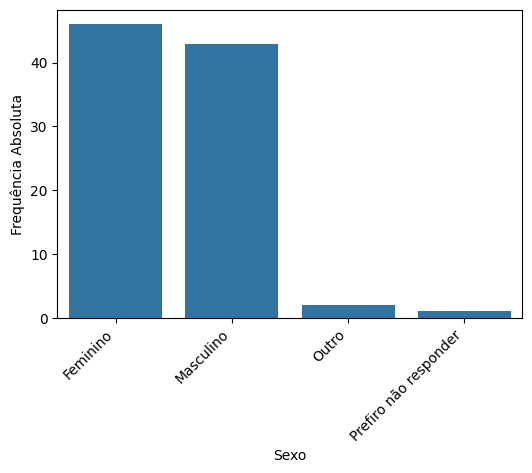

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_posgraduacao, x = dados_estudantes_de_posgraduacao['Sexo'])
plt.ylabel('Frequência Absoluta')
plt.xlabel('Sexo')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

In [ ]:
dados_estudantes_de_posgraduacao['Ano_ingresso'] = pd.to_numeric(dados_estudantes_de_posgraduacao['Ano_ingresso']).astype('Int64')
display(dados_estudantes_de_posgraduacao['Ano_ingresso'].dtype)

Int64Dtype()

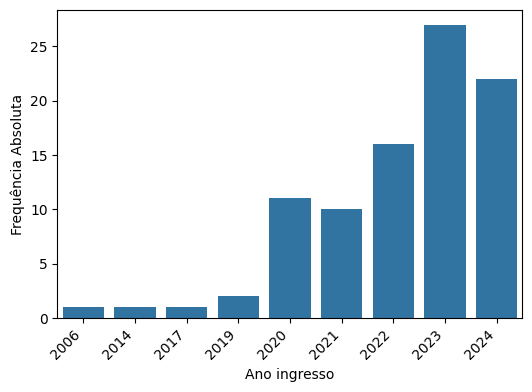

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_posgraduacao, x = dados_estudantes_de_posgraduacao['Ano_ingresso'])
plt.xlabel('Ano ingresso')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

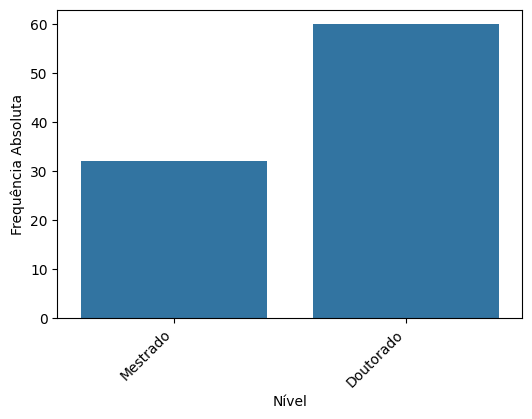

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dados_estudantes_de_posgraduacao, x = dados_estudantes_de_posgraduacao['Nível'])
plt.xlabel('Nível')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

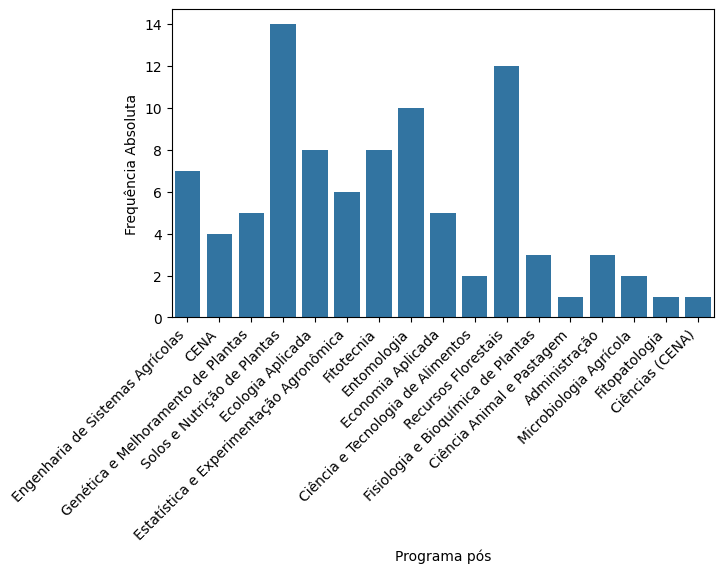

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=dados_estudantes_de_posgraduacao, x = dados_estudantes_de_posgraduacao['Programa_pós'])
plt.xlabel('Programa pós')
plt.ylabel('Frequência Absoluta')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

In [ ]:
dados_estudantes_de_posgraduacao.columns

Index(['Vínculo', 'Sexo', 'Ano_ingresso', 'Programa_pós', 'Nível',
       'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação',
       'Particip_fora', 'Interesse', 'Conhecimento', 'Compromisso',
       'Transformador', 'Segurança', 'Alt_seg_noite', 'Distância',
       'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias', 'S_cal',
       'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol', 'C_pert',
       'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
       'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
       'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi',
       'C_mobl', 'C_aPSaude', 'Interesse_ativ', 'idade_limpa'],
      dtype='object')

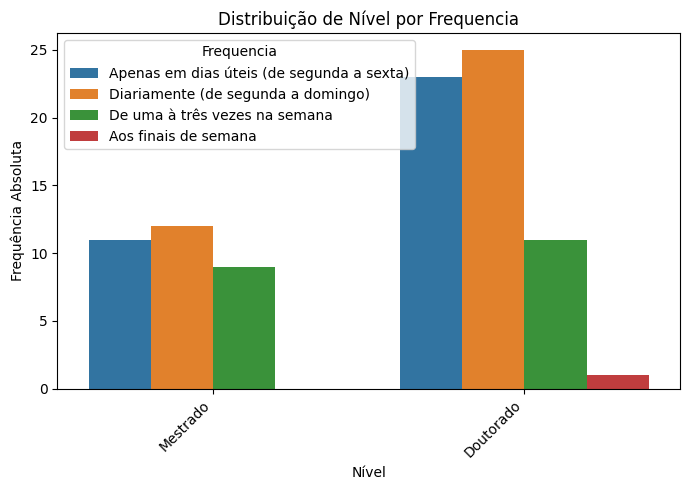

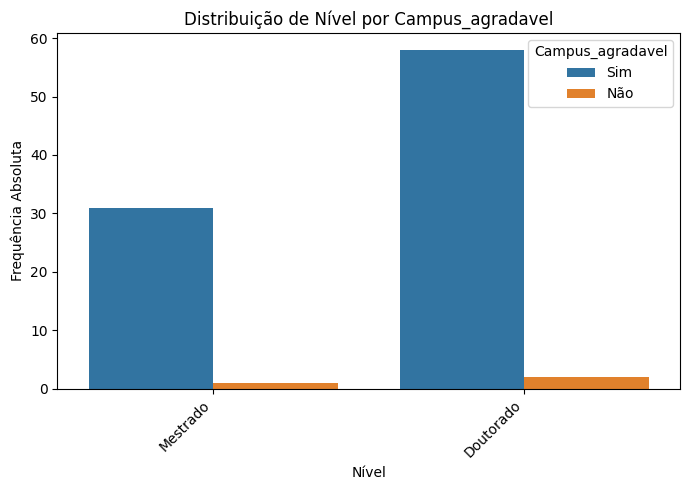

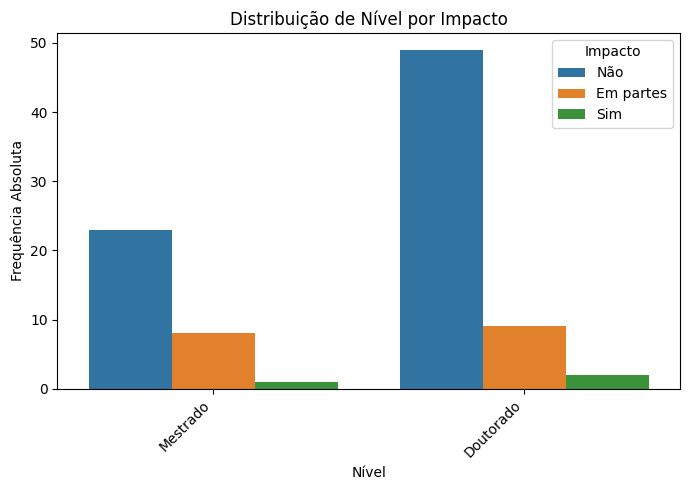

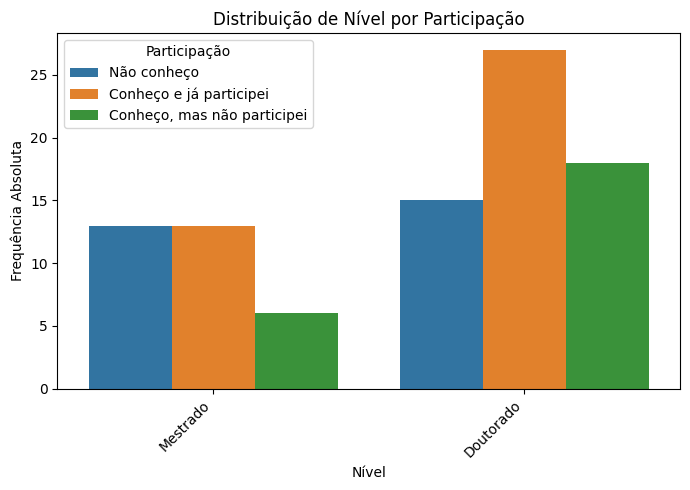

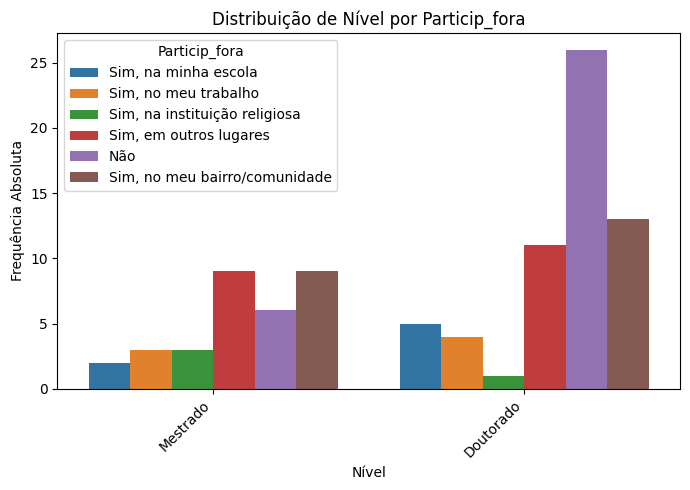

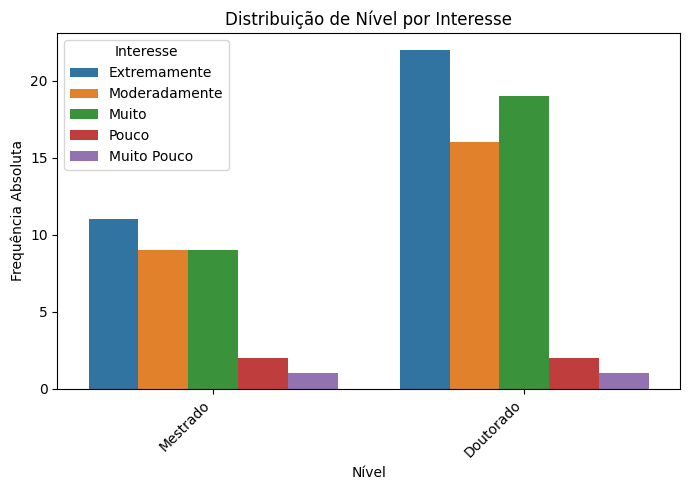

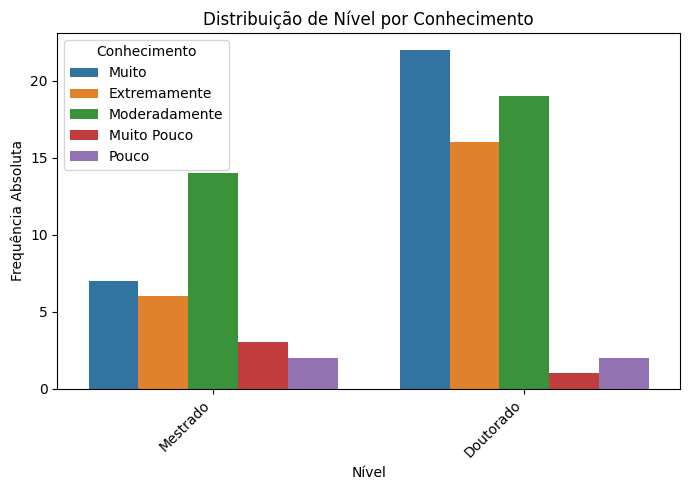

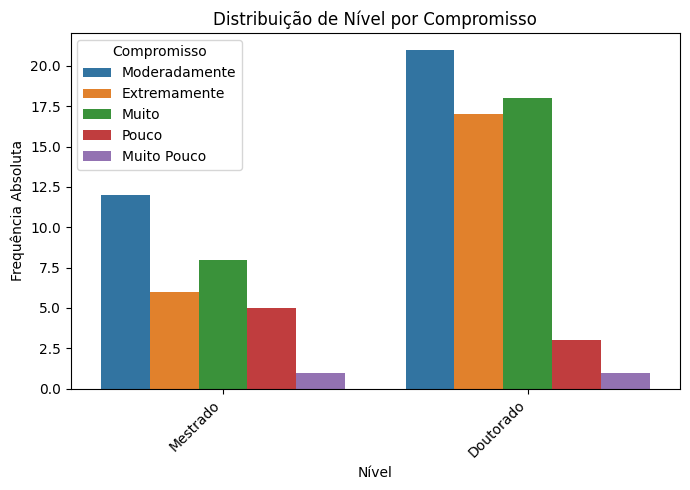

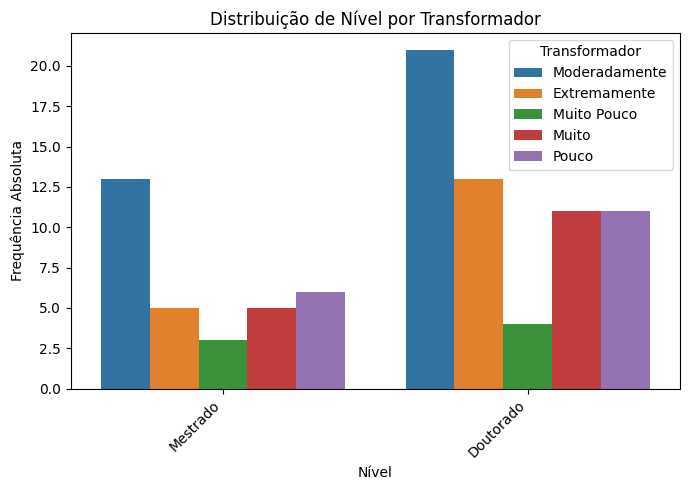

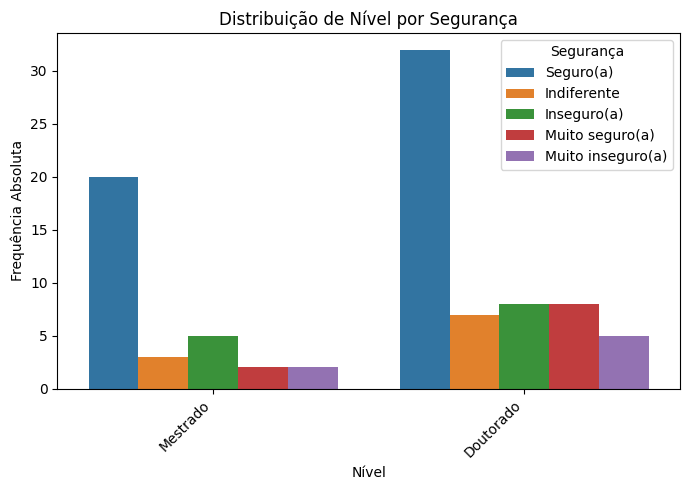

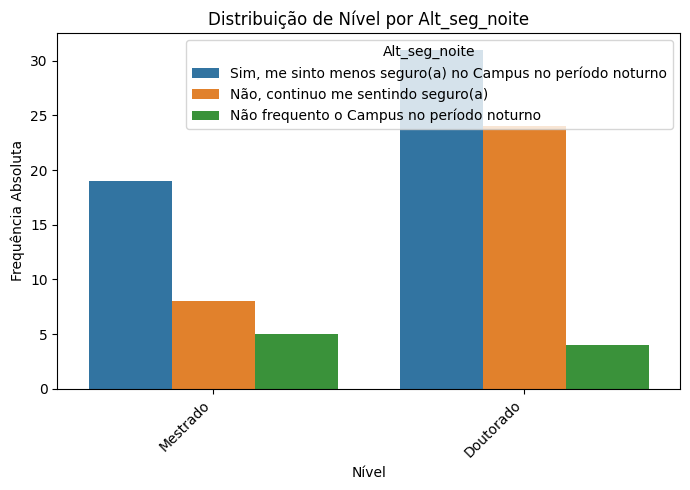

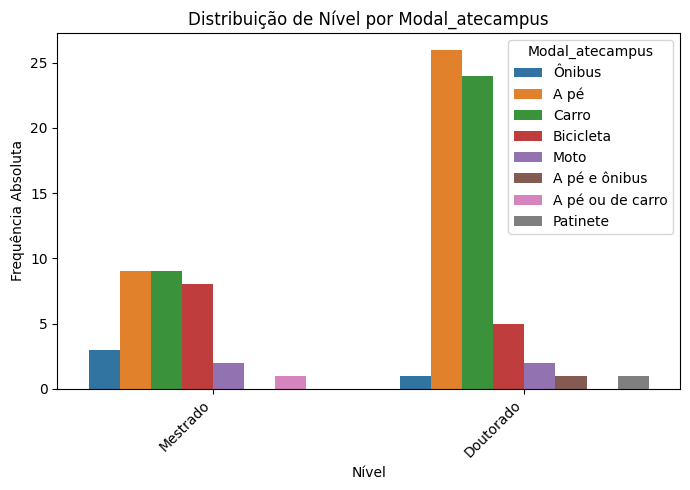

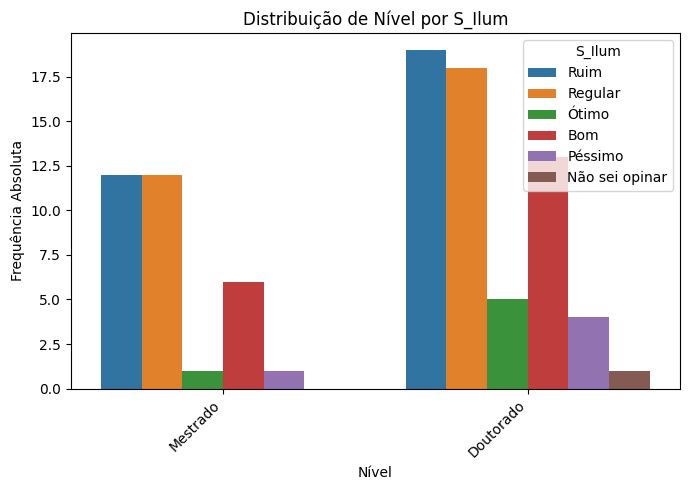

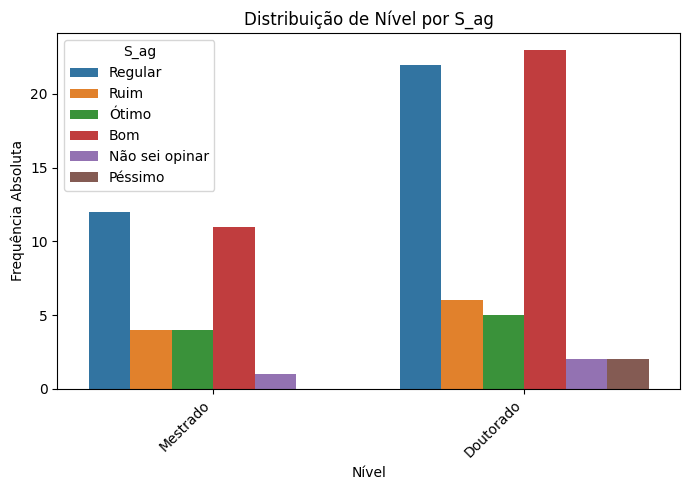

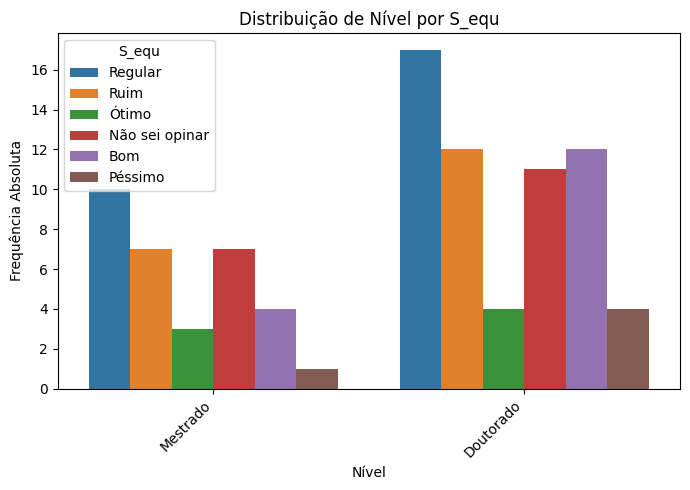

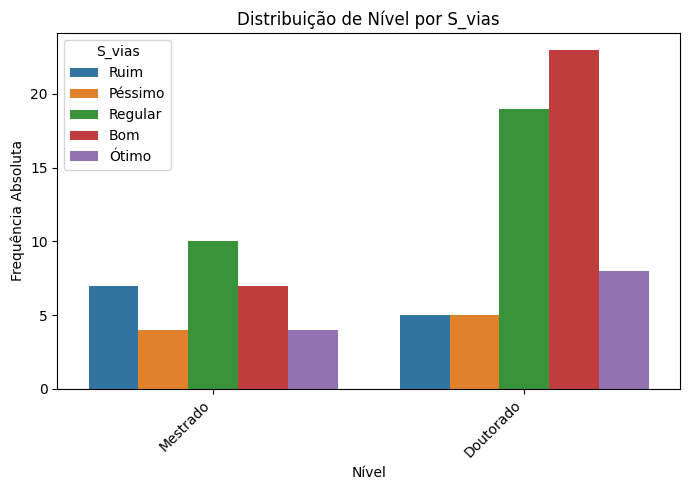

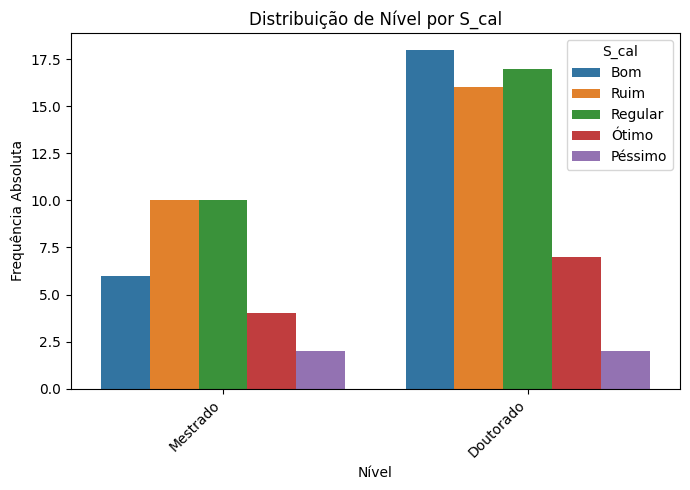

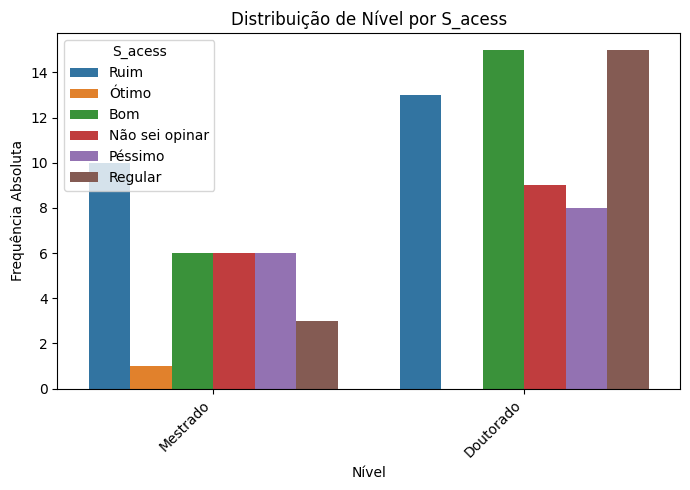

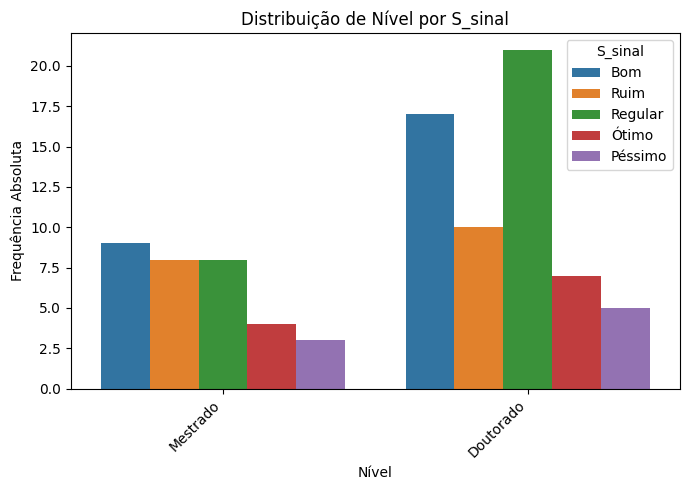

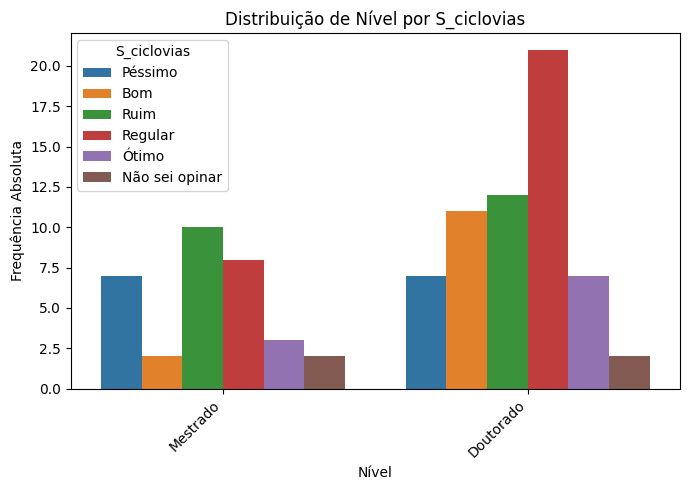

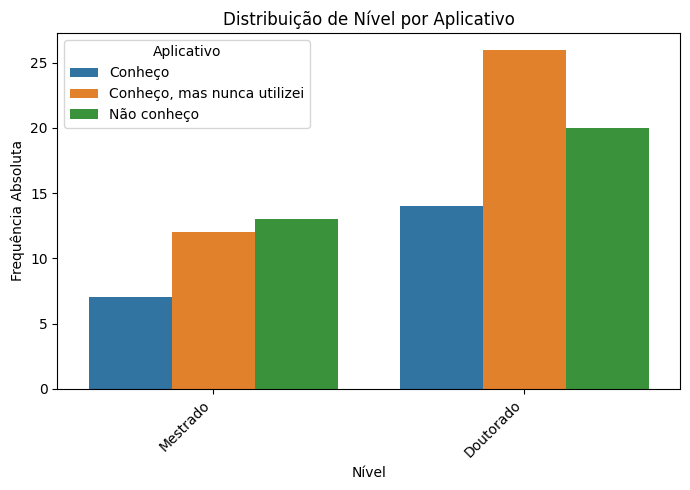

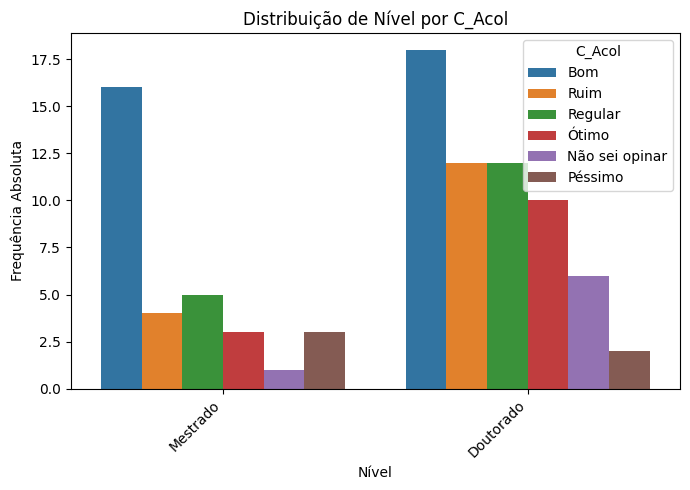

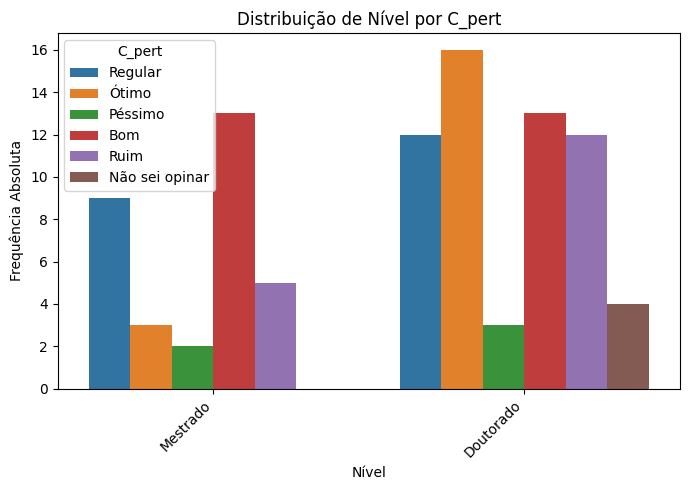

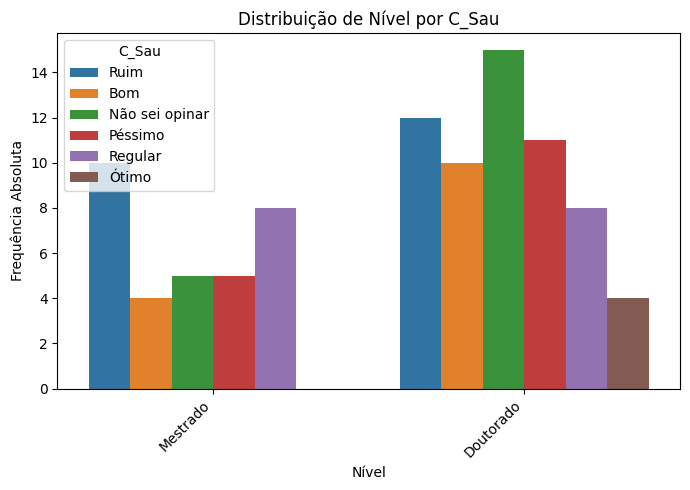

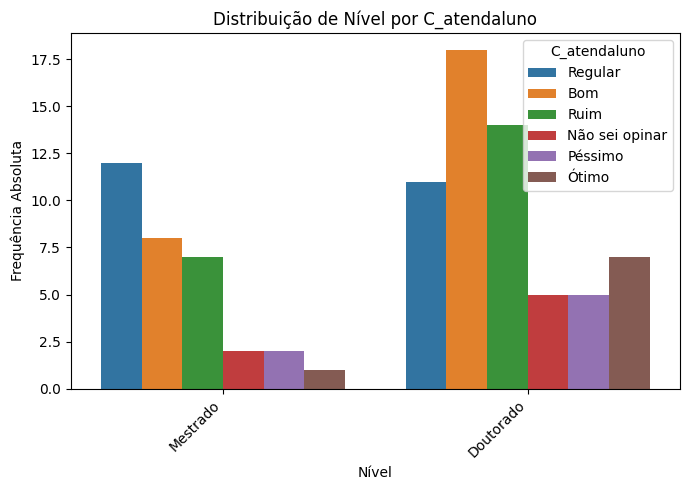

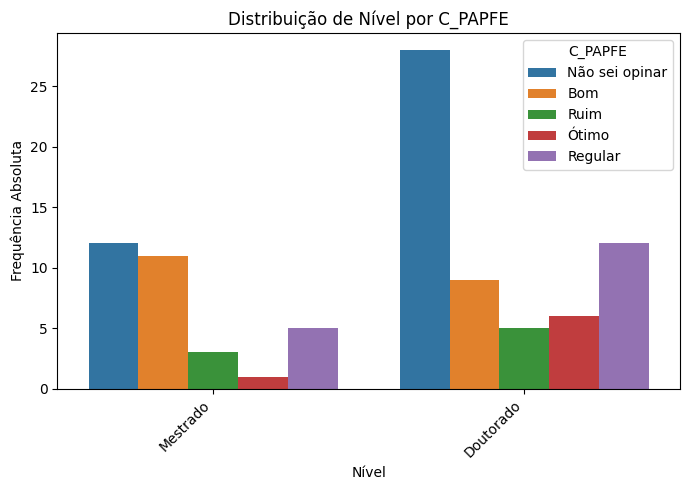

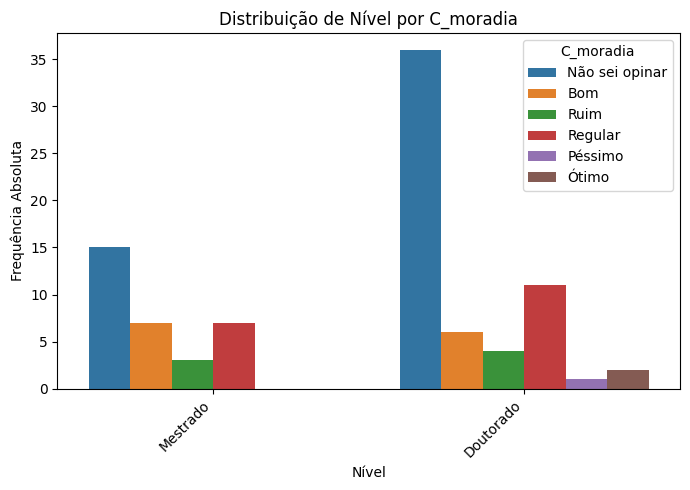

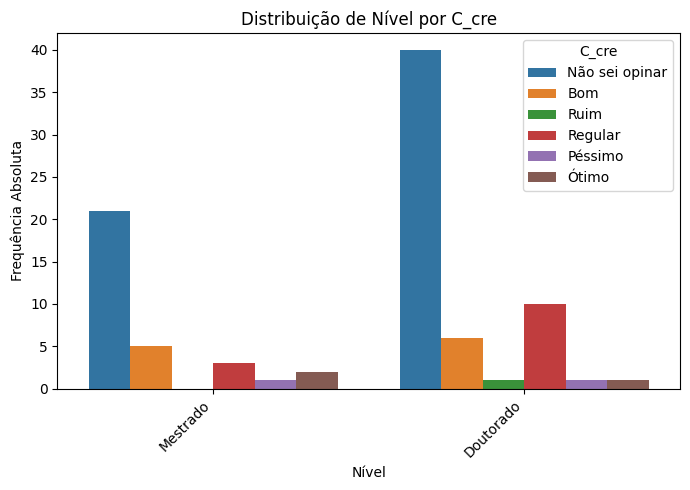

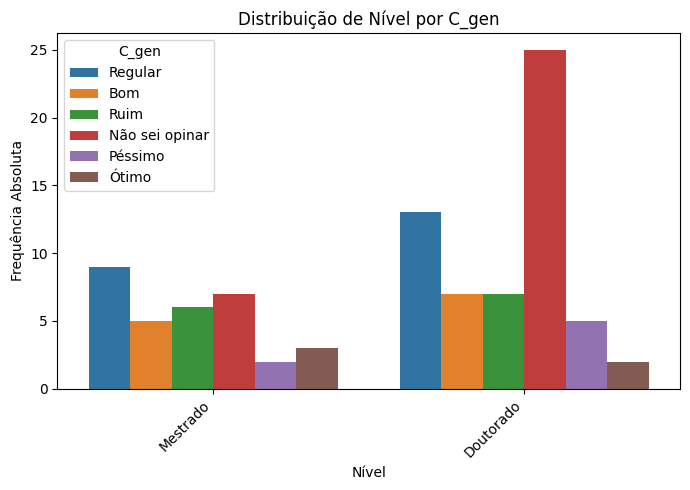

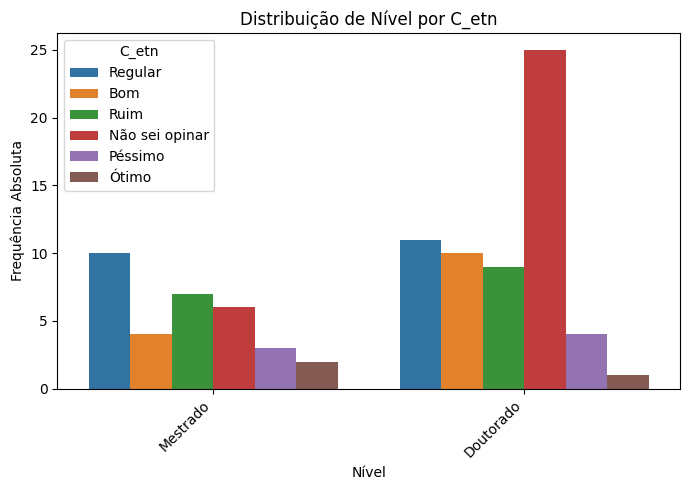

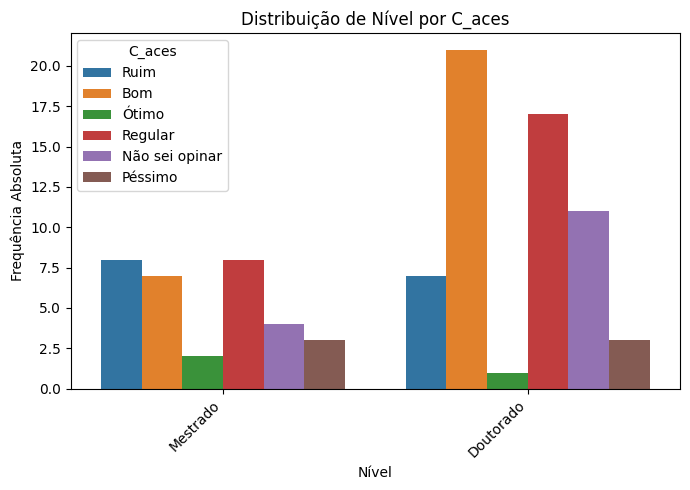

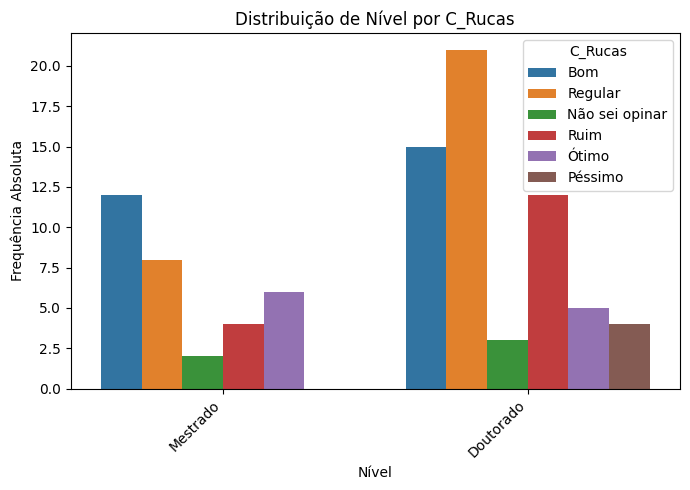

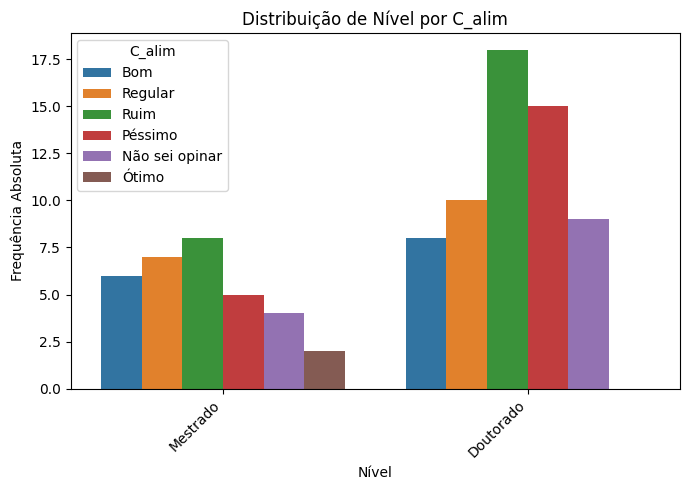

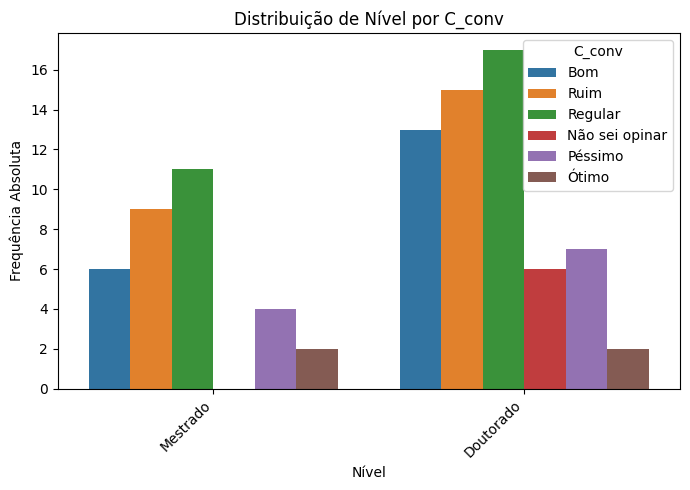

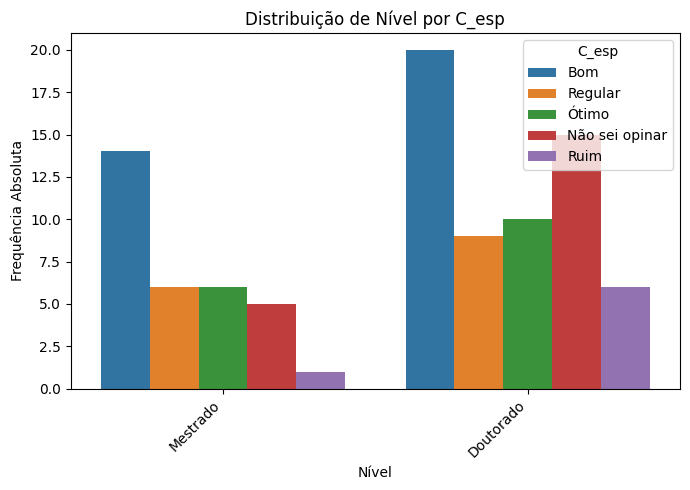

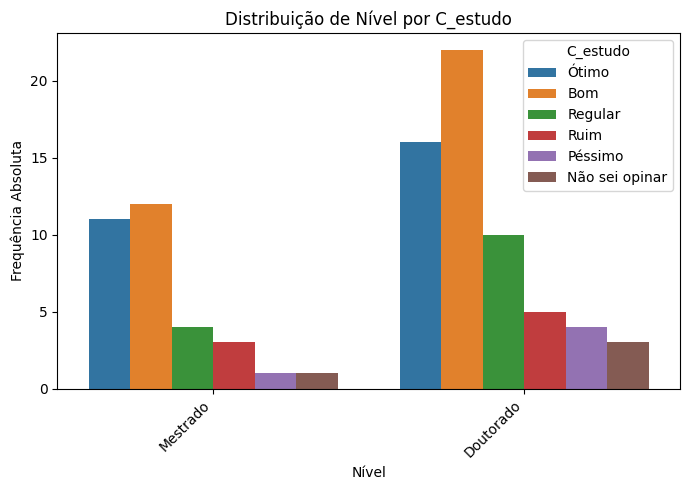

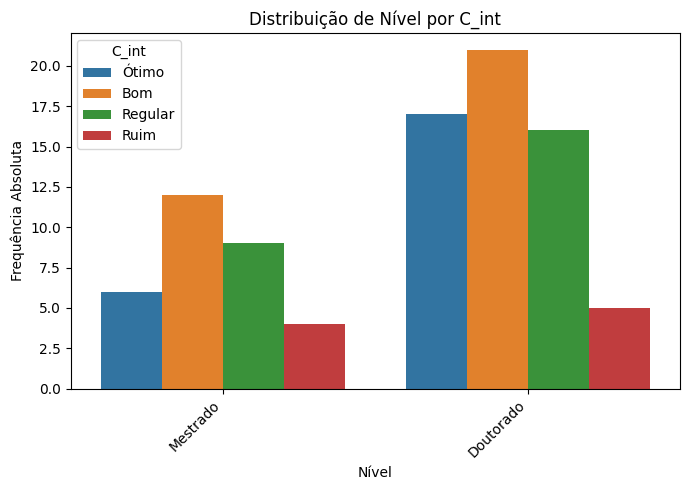

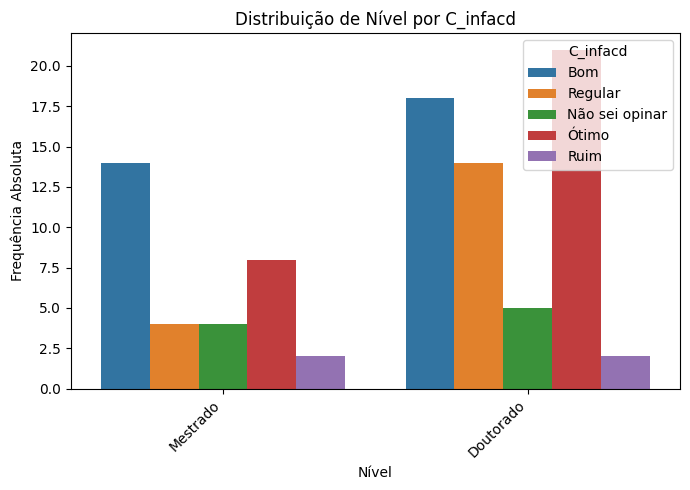

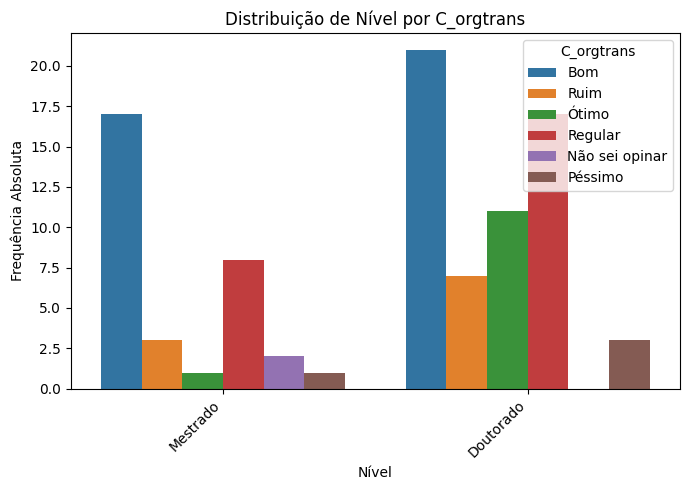

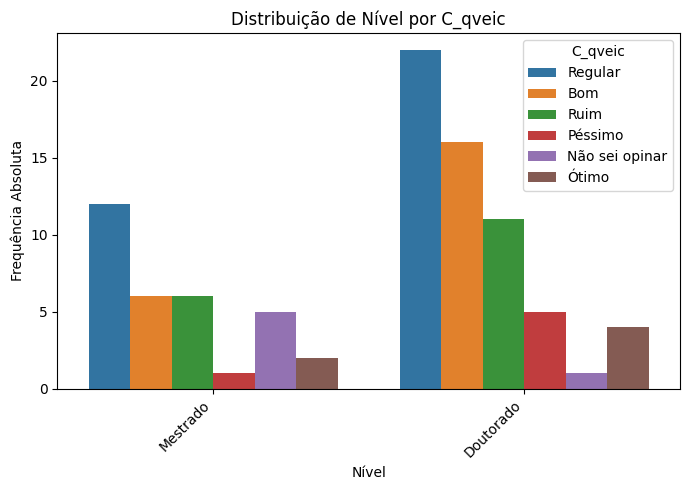

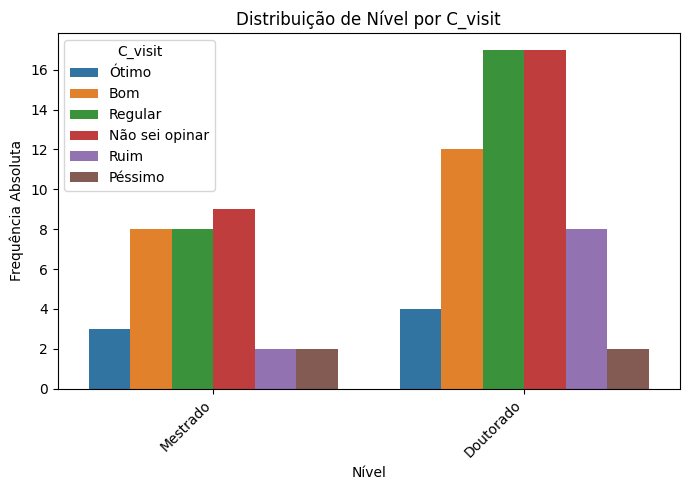

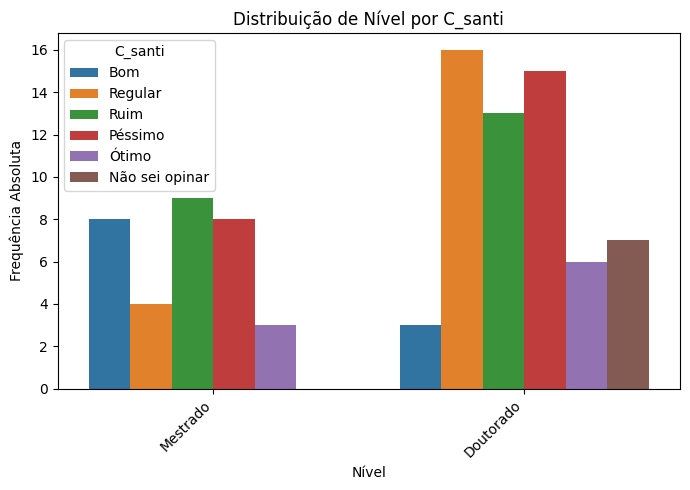

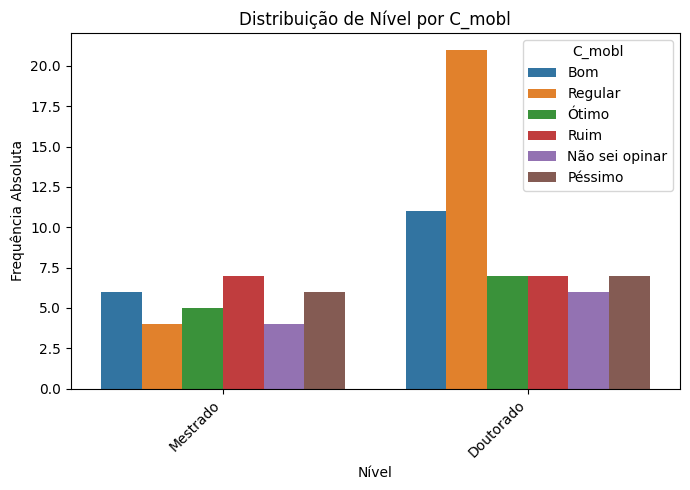

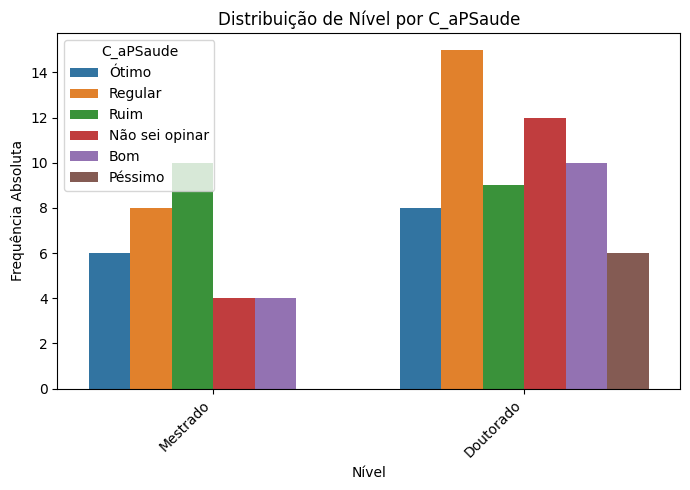

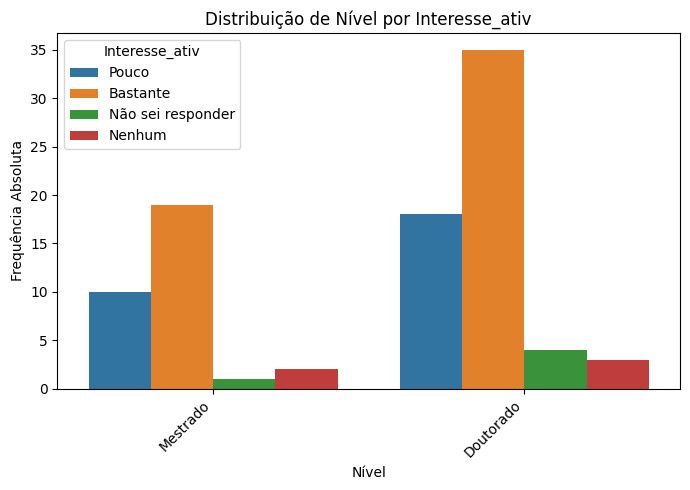

In [ ]:
variables_to_plot = [
    'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
    'Interesse', 'Conhecimento', 'Compromisso', 'Transformador', 'Segurança',
    'Alt_seg_noite', 'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias',
    'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol',
    'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
    'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
    'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi', 'C_mobl',
    'C_aPSaude', 'Interesse_ativ'
]

for col in variables_to_plot:
    if col in dados_estudantes_de_posgraduacao.columns and 'Nível' in dados_estudantes_de_posgraduacao.columns:
        plt.figure(figsize=(7, 5))
        sns.countplot(data=dados_estudantes_de_posgraduacao, x='Nível', hue=col)
        plt.title(f'Distribuição de Nível por {col}')
        plt.xlabel('Nível')
        plt.ylabel('Frequência Absoluta')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"One or both columns ('Nível', '{col}') not found in the DataFrame.")

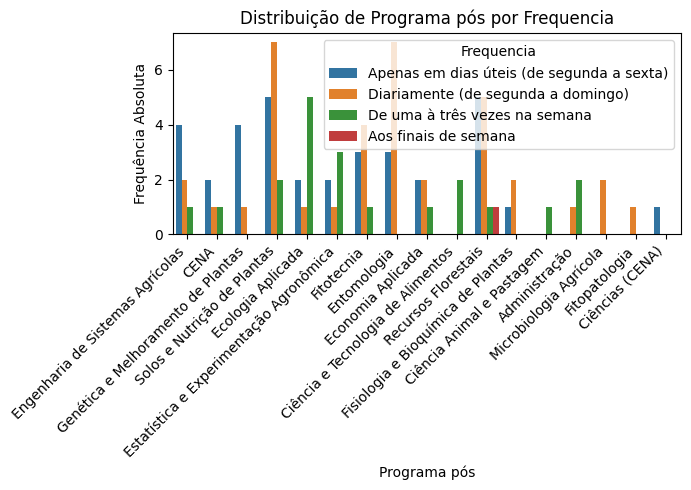

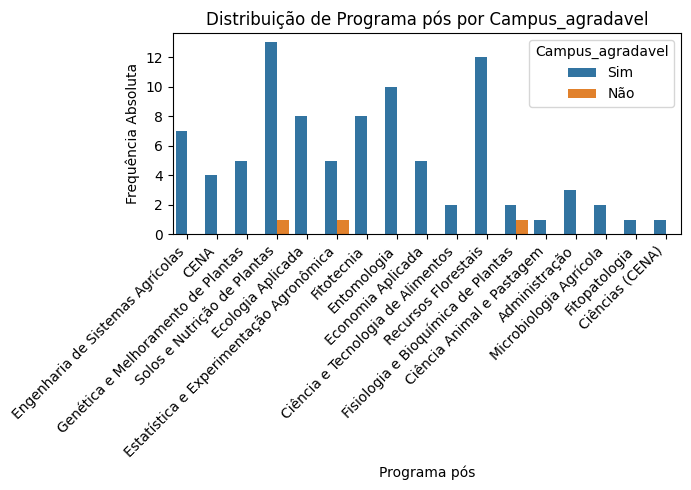

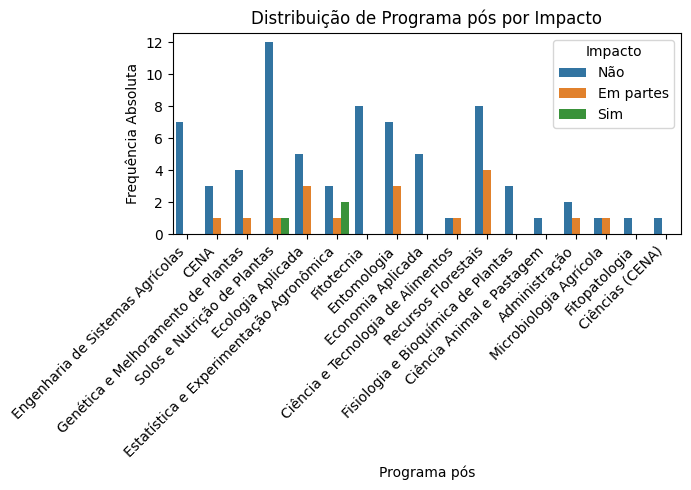

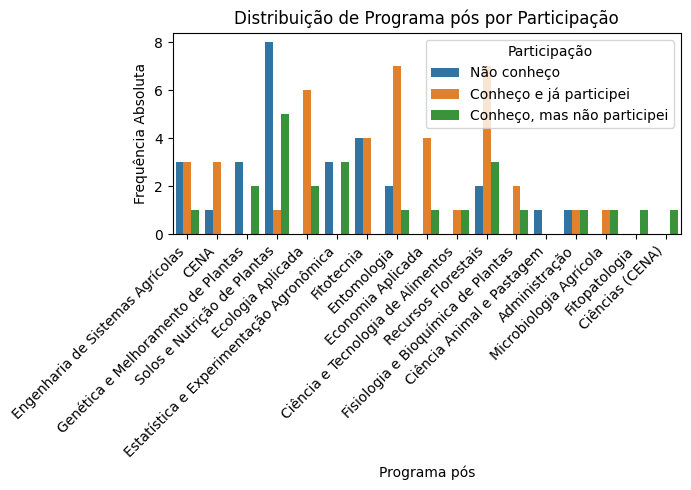

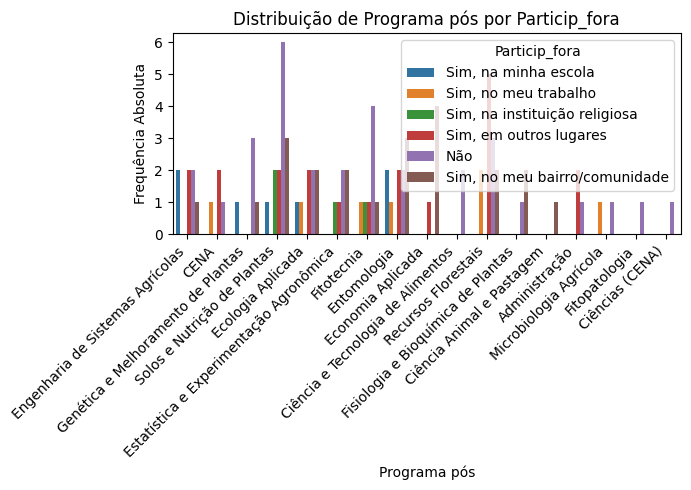

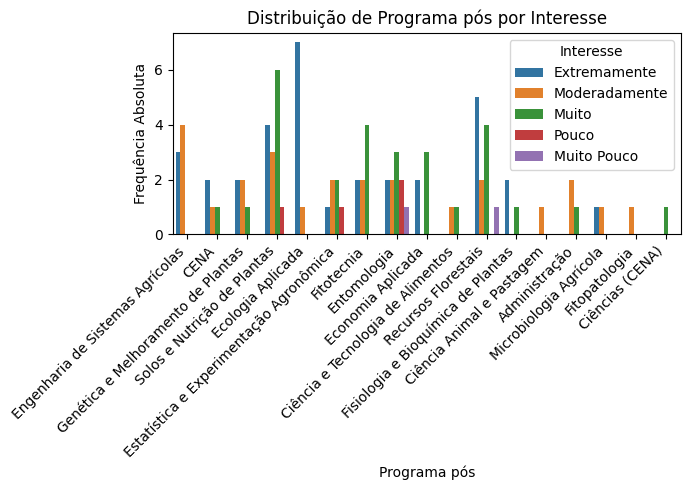

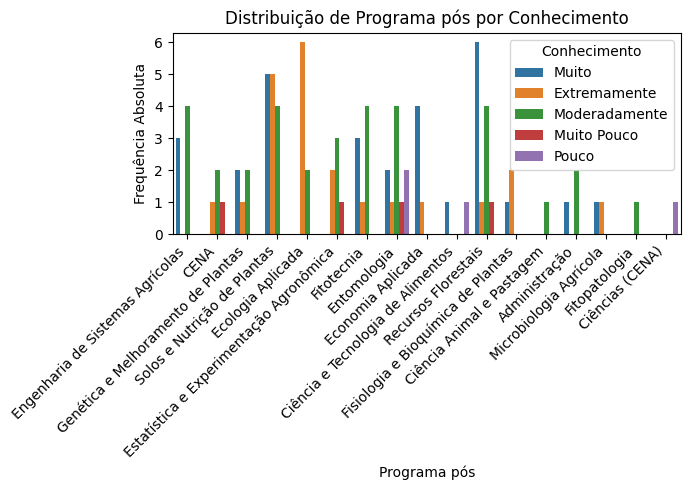

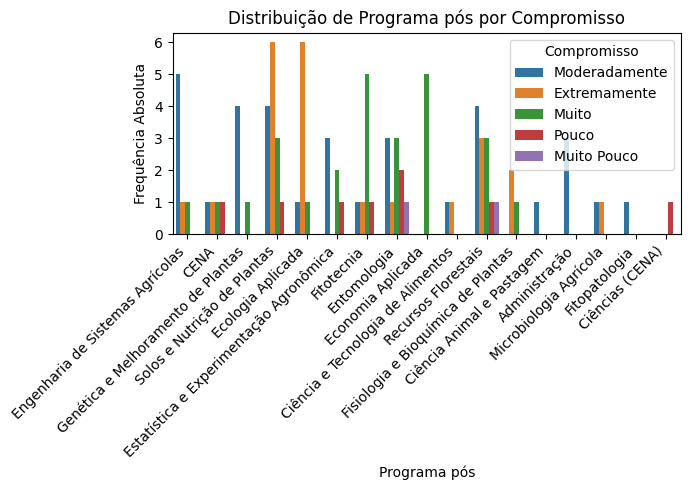

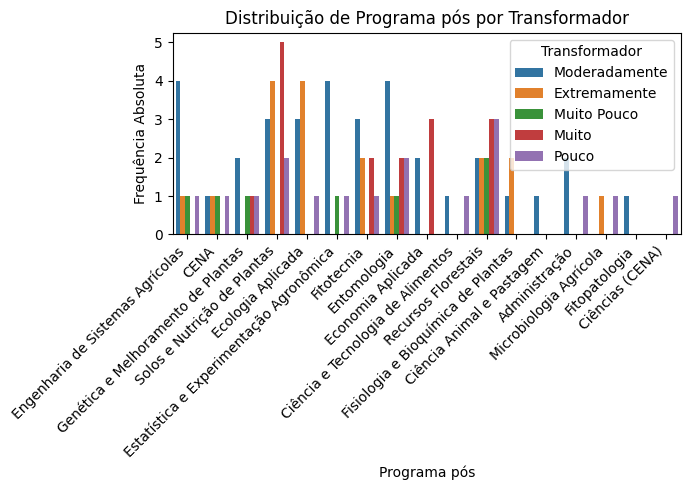

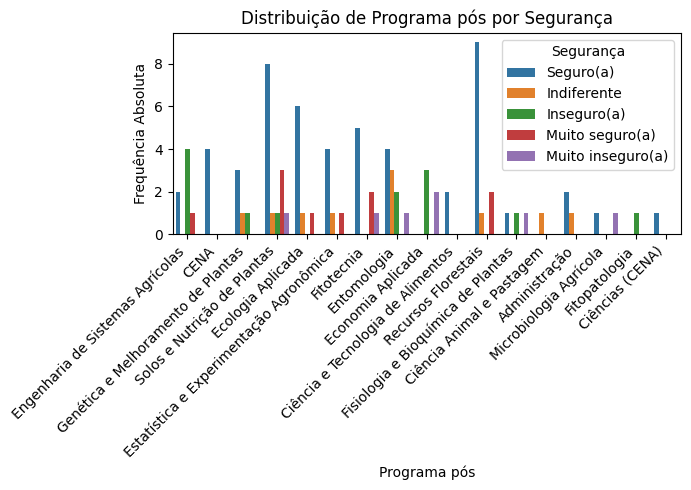

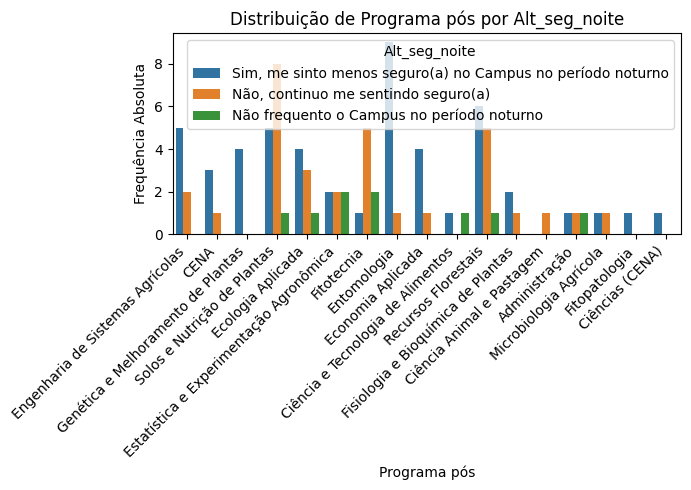

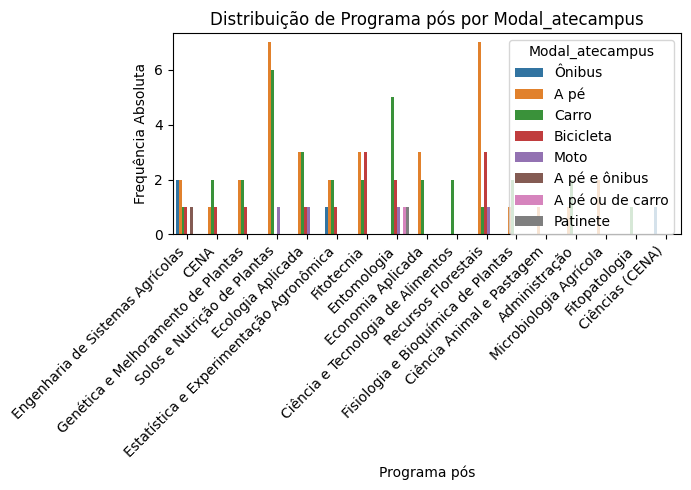

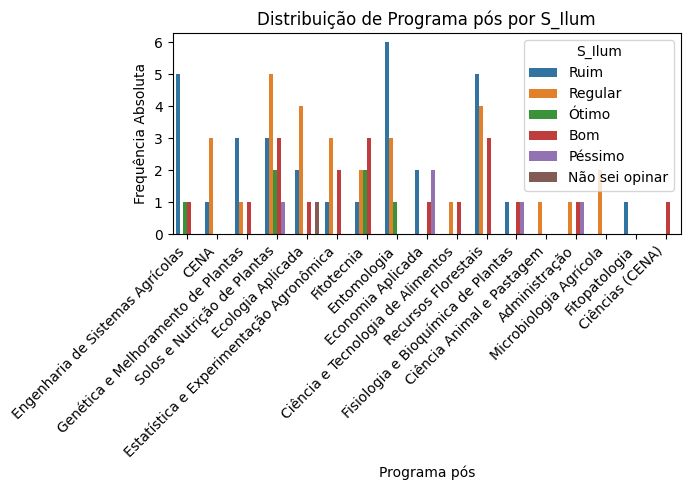

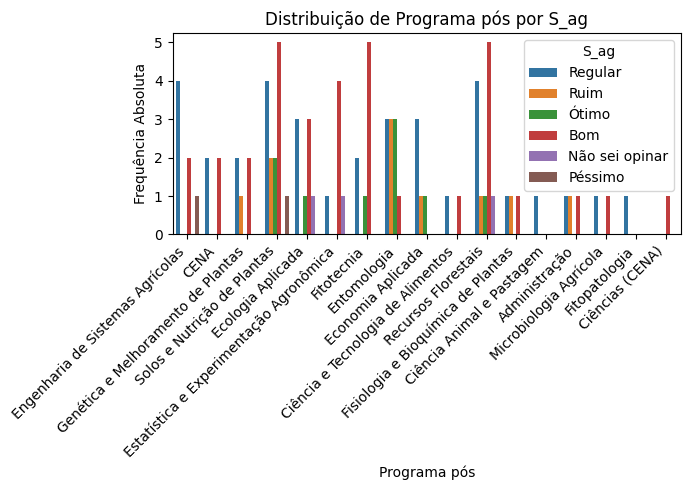

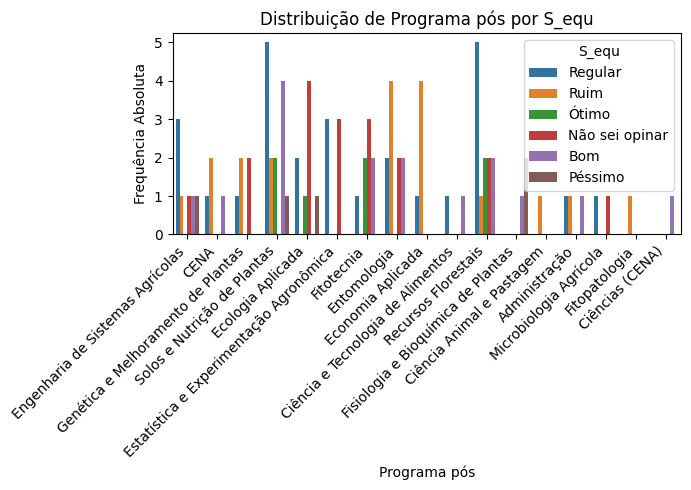

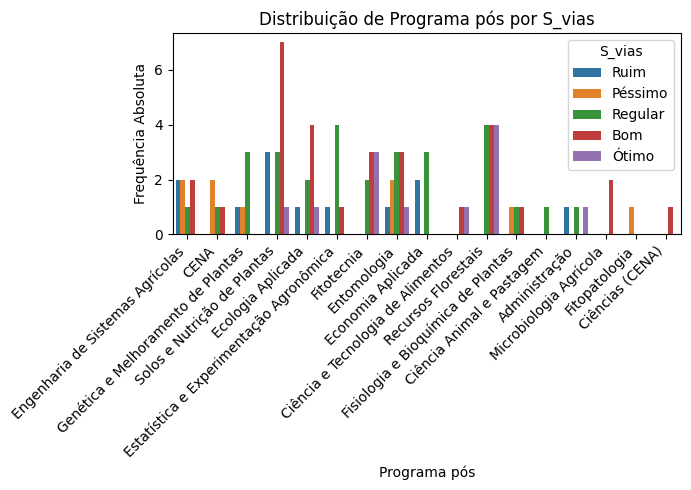

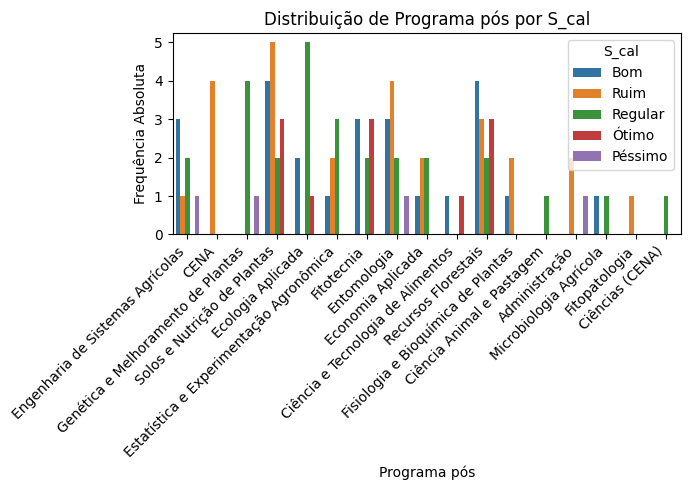

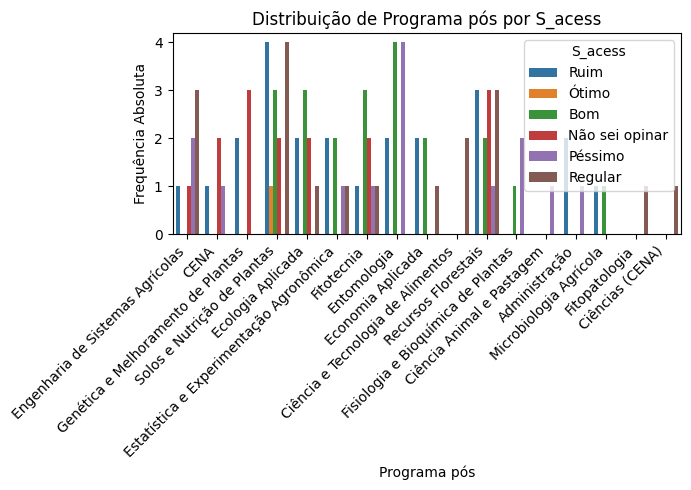

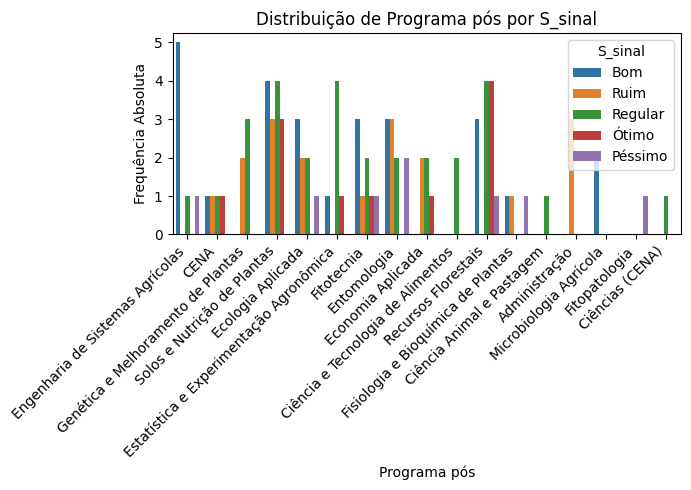

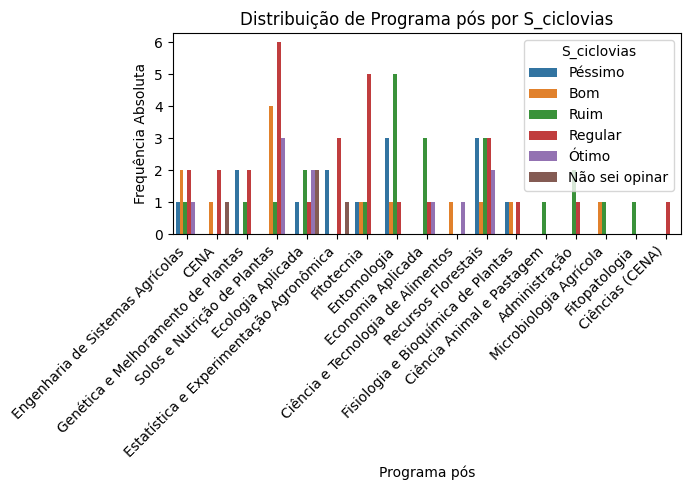

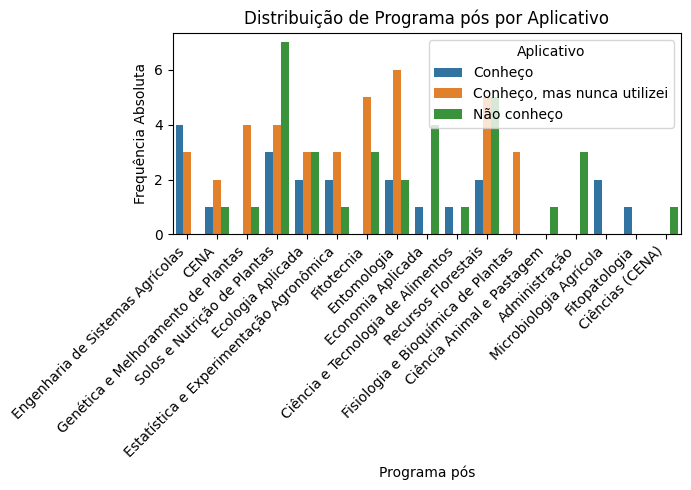

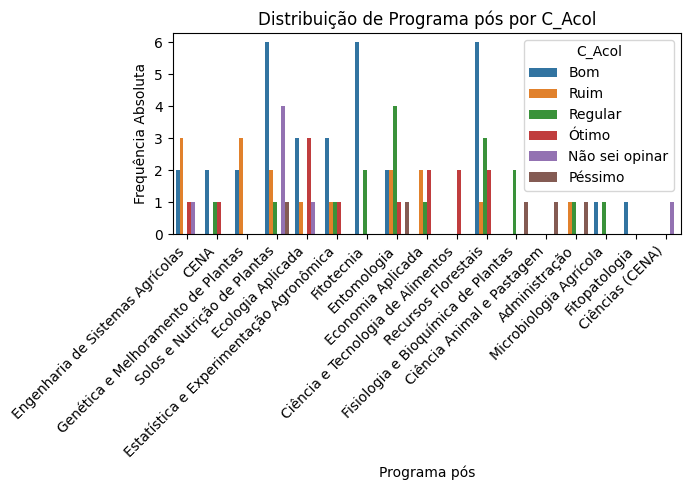

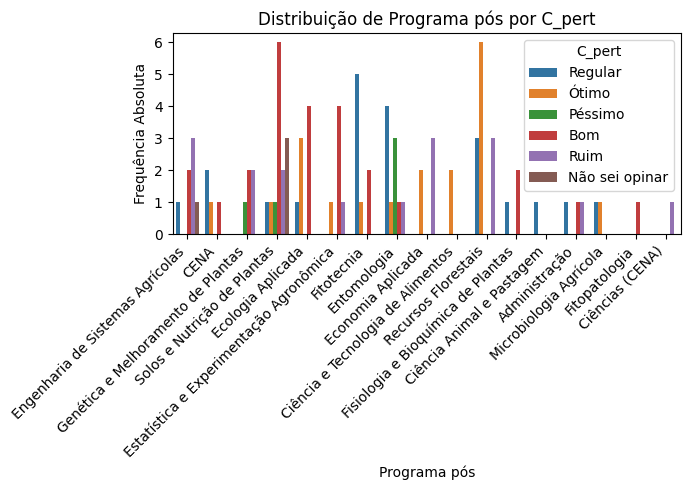

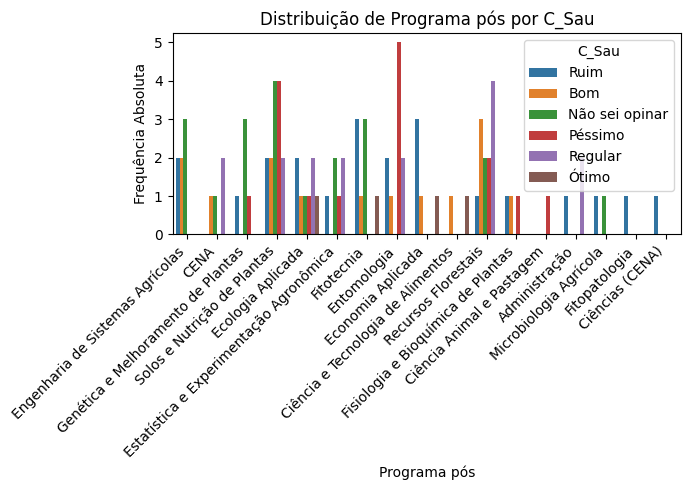

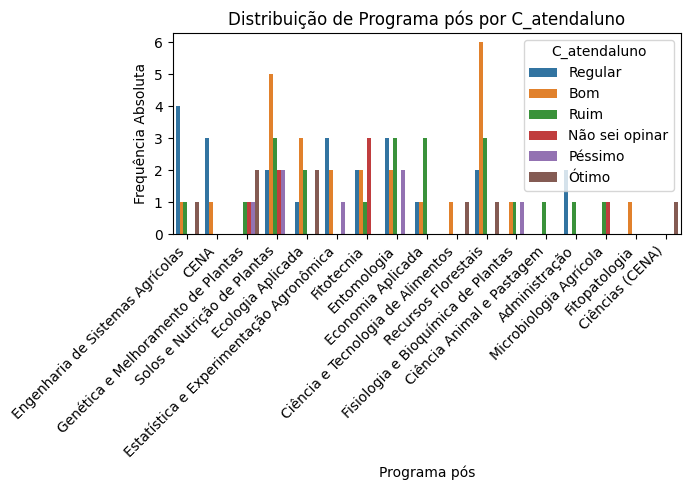

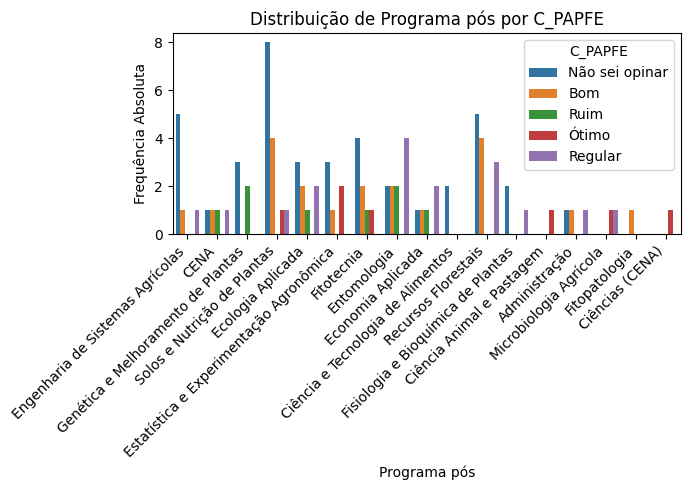

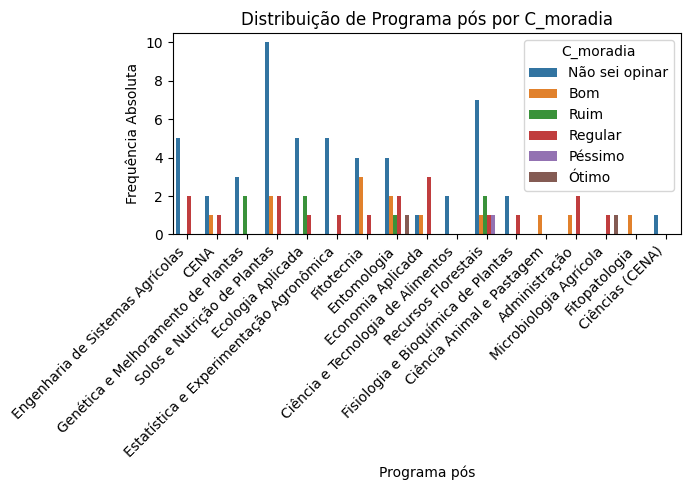

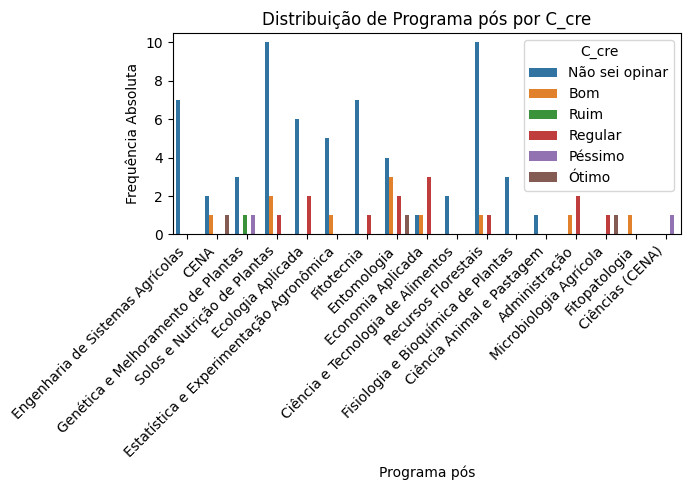

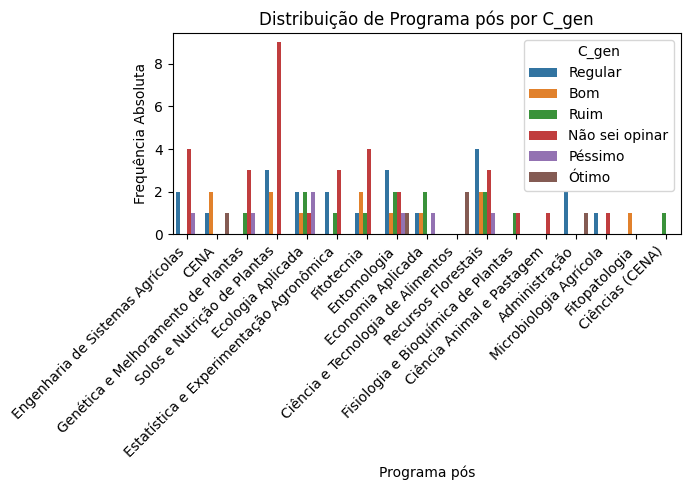

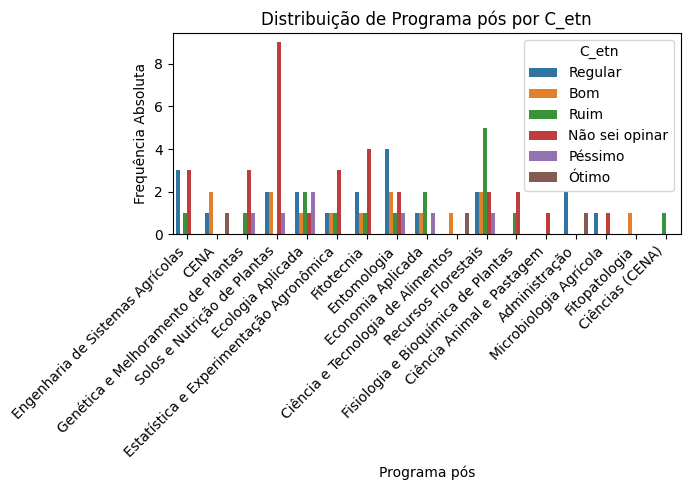

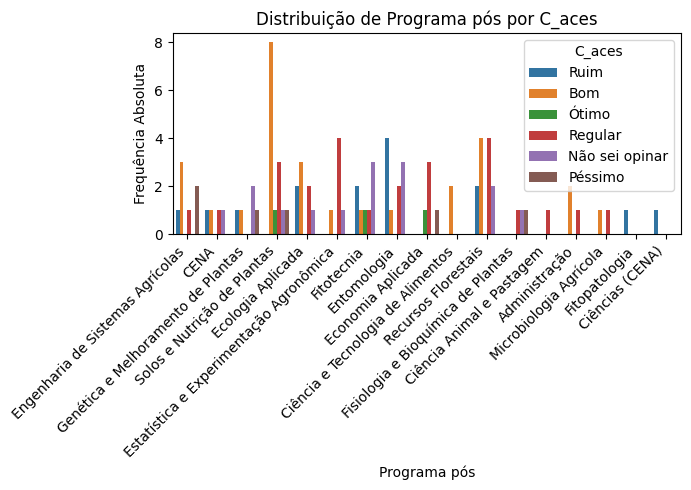

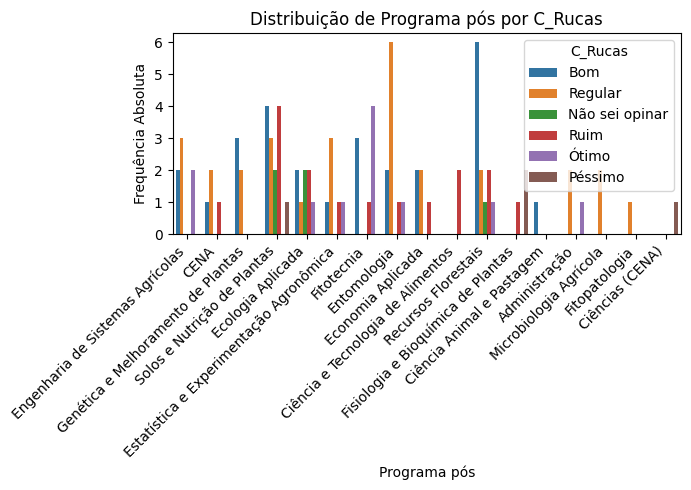

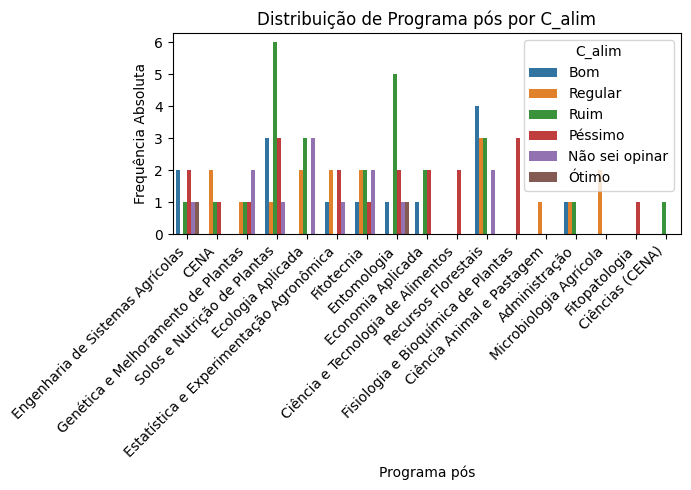

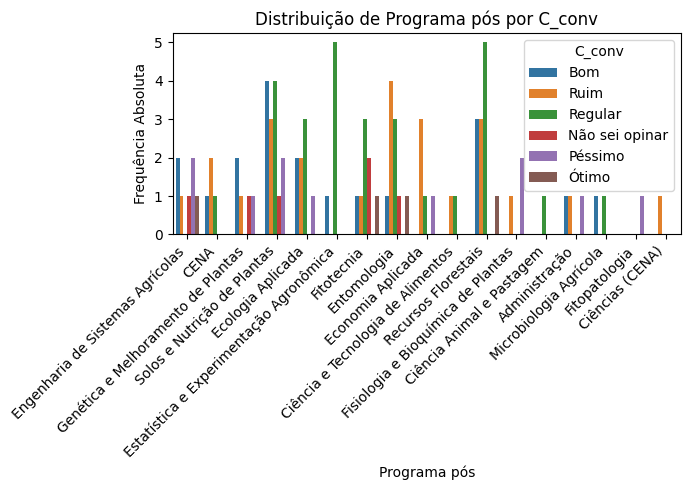

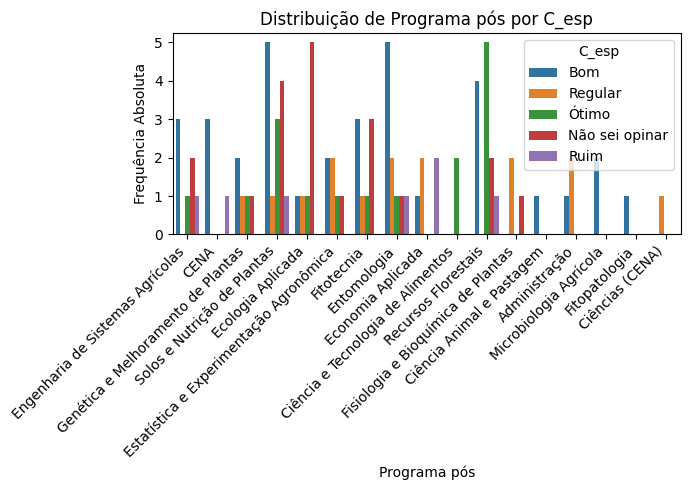

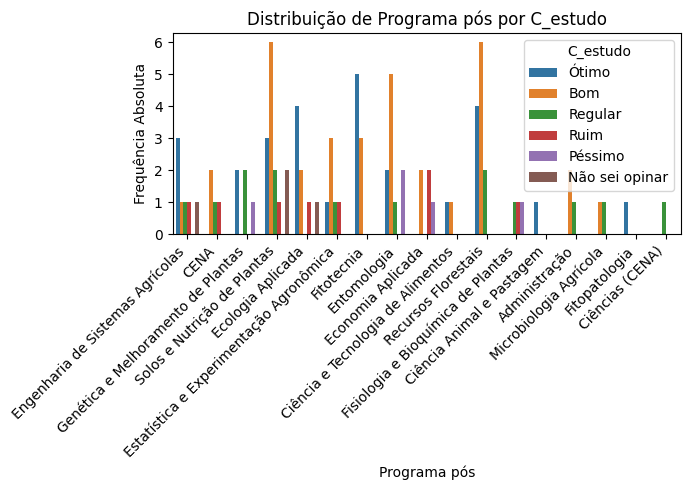

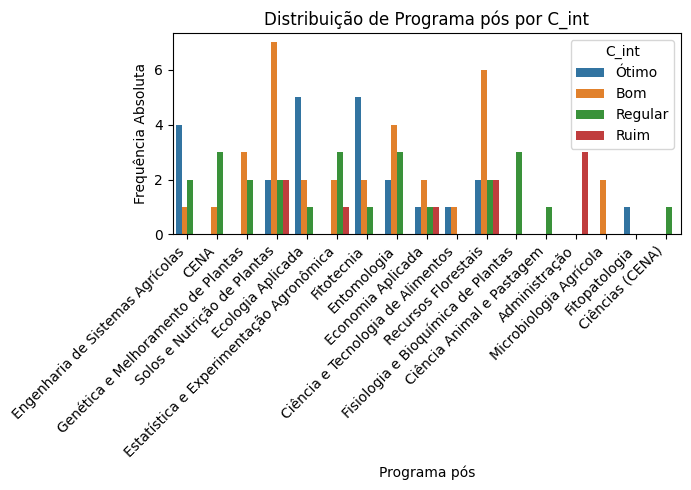

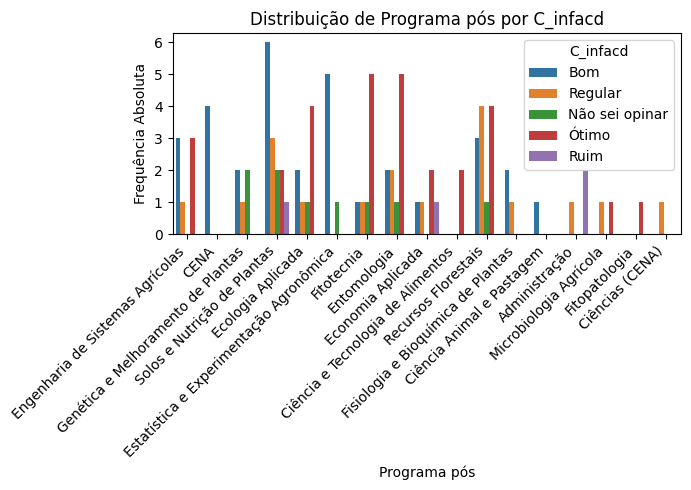

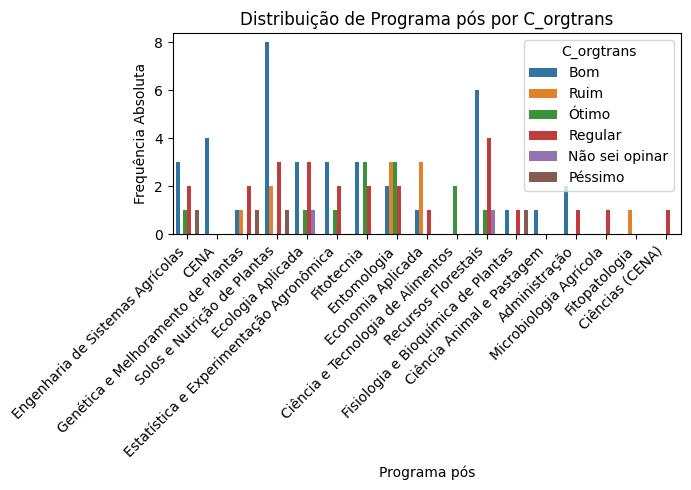

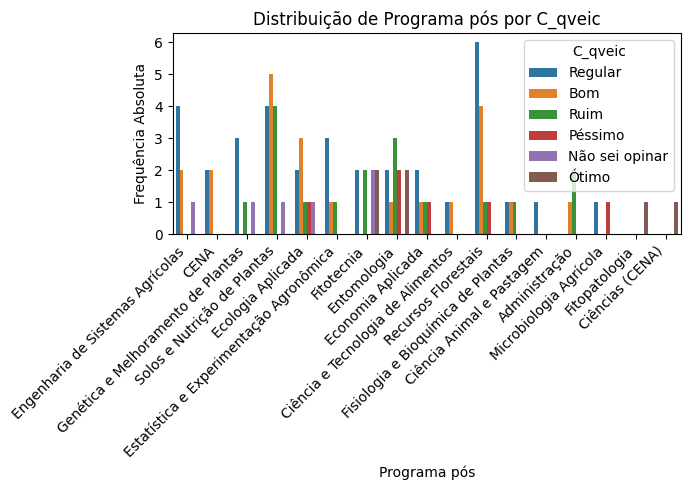

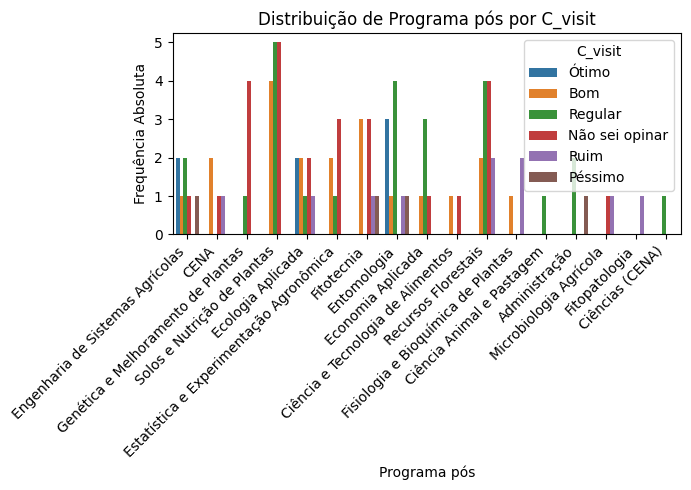

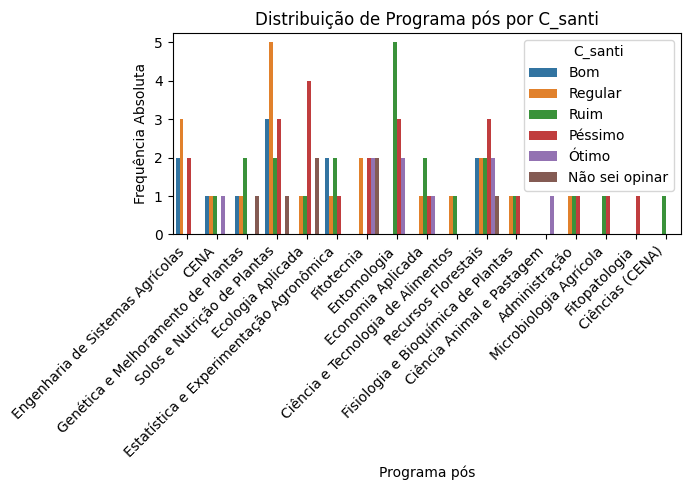

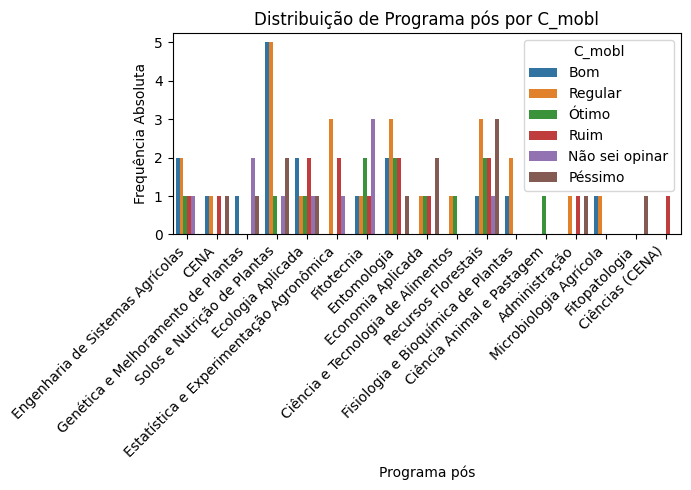

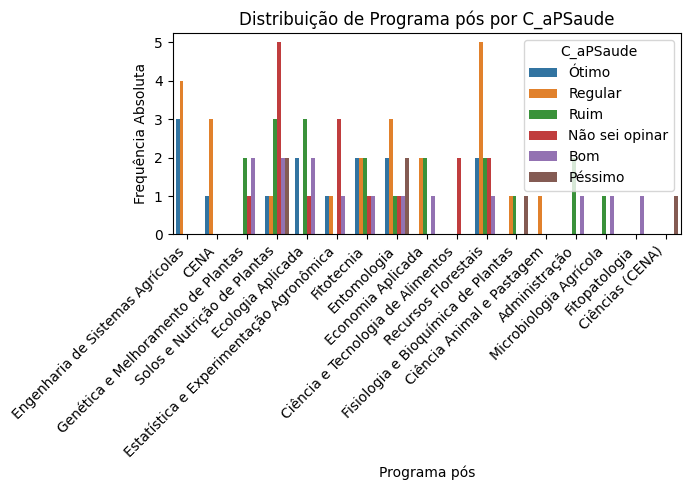

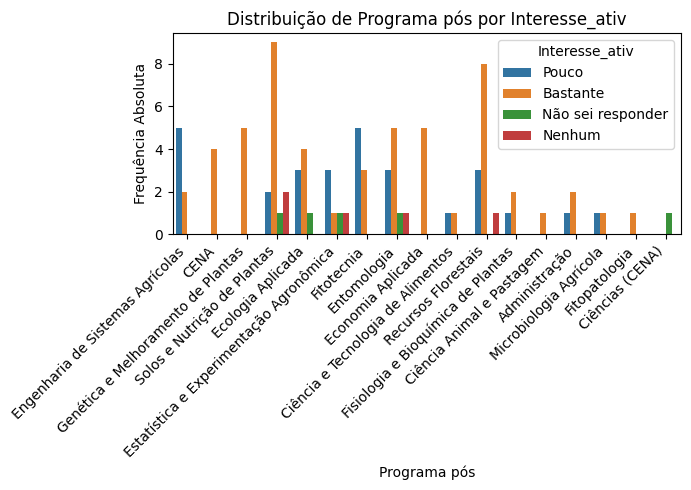

In [ ]:
variables_to_plot = [
    'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação', 'Particip_fora',
    'Interesse', 'Conhecimento', 'Compromisso', 'Transformador', 'Segurança',
    'Alt_seg_noite', 'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias',
    'S_cal', 'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol',
    'C_pert', 'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
    'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
    'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_santi', 'C_mobl',
    'C_aPSaude', 'Interesse_ativ'
]

for col in variables_to_plot:
    if col in dados_estudantes_de_posgraduacao.columns and 'Programa_pós' in dados_estudantes_de_posgraduacao.columns:
        plt.figure(figsize=(7, 5))
        sns.countplot(data=dados_estudantes_de_posgraduacao, x='Programa_pós', hue=col)
        plt.title(f'Distribuição de Programa pós por {col}')
        plt.xlabel('Programa pós')
        plt.ylabel('Frequência Absoluta')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"One or both columns ('Nível', '{col}') not found in the DataFrame.")